In [1]:
from matplotlib import pyplot as plt
import numpy as np

from modules import calib

In [2]:
DIR = "surface/"

In [3]:
x = calib.px2mm(np.linspace(693, -46, 32))
x = x[:-2]

ave_dx = []
std_dx = []

for f in range(500, 2000, 500):
    for q in range(1, 4):
        ave_file = f"ave_500_{f}_{q}_"
        std_file = f"std_500_{f}_{q}_"
        ave_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + ave_file + "dx.csv", delimiter=',')[:-2])))
        std_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + std_file + "dx.csv", delimiter=',')[:-2])))

ave_dx[3:6], ave_dx[6:9] = ave_dx[6:9], ave_dx[3:6]
std_dx[3:6], std_dx[6:9] = std_dx[6:9], std_dx[3:6]
ave_dx[3], ave_dx[5] = ave_dx[5], ave_dx[3]
std_dx[3], std_dx[5] = std_dx[5], std_dx[3]

In [4]:
for i in range(1, 4):
    ave_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + f"ave_{i*10}_dx.csv", delimiter=',')[:-2])))
    std_dx.append(calib.f2s(calib.px2mm(np.loadtxt(DIR + f"std_{i*10}_dx.csv", delimiter=',')[:-2])))

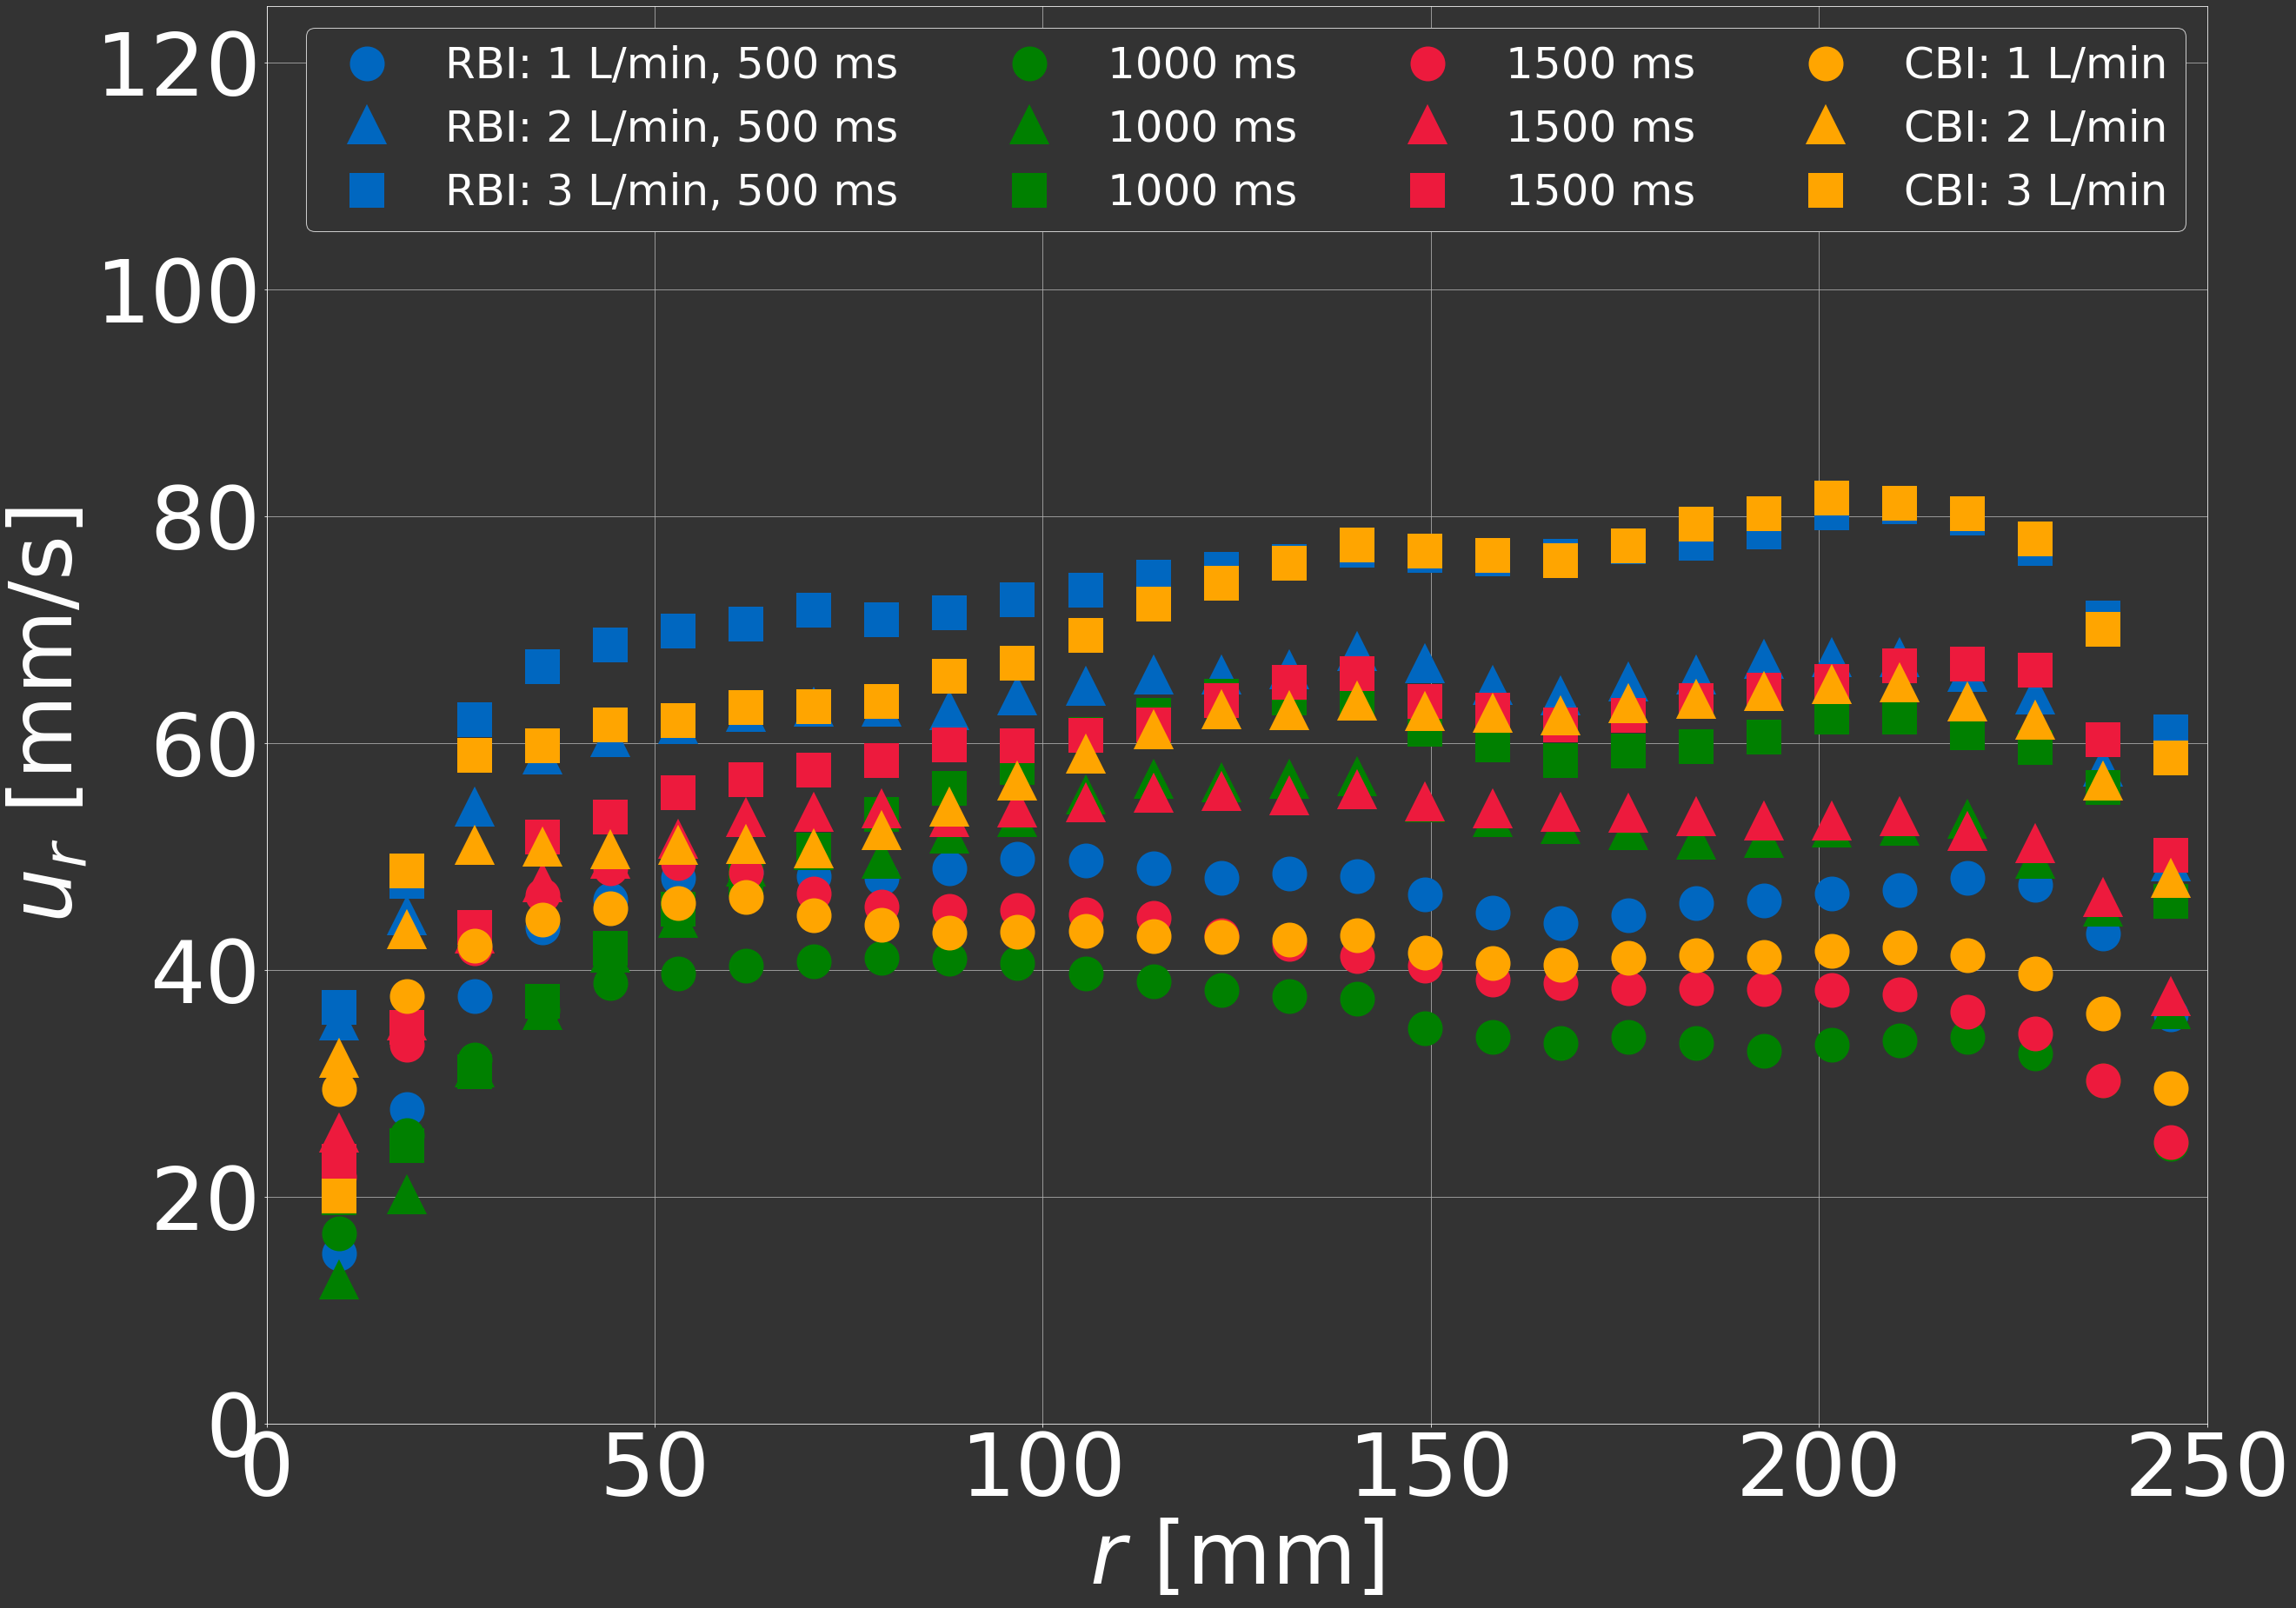

In [17]:
fig, ax = plt.subplots(facecolor="#333333", figsize=(40, 30))

ax.set_facecolor('#333333')
ax.spines['top'].set_color('#ffffff')
ax.spines['bottom'].set_color('#ffffff')
ax.spines['left'].set_color('#ffffff')
ax.spines['right'].set_color('#ffffff')
ax.tick_params(axis='x', colors='#ffffff')
ax.tick_params(axis='y', colors='#ffffff')
ax.xaxis.label.set_color('#ffffff')
ax.yaxis.label.set_color('#ffffff')

m = ["o", "^", "s"]
plt.xlim(0, 250)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel(r"$u_{r}$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 0:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#0067c0", label=f"RBI: {1 + i % 3} L/min, 500 ms", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#0067c0", label=f"RBI: {1 + i % 3} L/min, 500 ms", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#0067c0", label=f"RBI: {1 + i % 3} L/min, 500 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 1:
        if i % 3 == 0:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#008000", label=f"1000 ms", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#008000", label=f"1000 ms", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#008000", label=f"1000 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 2:
        if i % 3 == 0:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#ed1a3d", label=f"1500 ms", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#ed1a3d", label=f"1500 ms", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="#ed1a3d", label=f"1500 ms", markersize=30, markeredgewidth=10)

    else:
        if i % 3 == 0:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="orange", label=f"CBI: {1 + i % 3} L/min", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="orange", label=f"CBI: {1 + i % 3} L/min", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x[:-1], -ave_dx[i][:-1], m[round(i%3)], color="orange", label=f"CBI: {1 + i % 3} L/min", markersize=30, markeredgewidth=10)

ax.legend(ncol=4, fontsize=50, facecolor='#333333', labelcolor='#ffffff', framealpha=1)
plt.grid()
ax.set_axisbelow(True)

# plt.show()
plt.savefig("imgs/surface_cbi_rbi.png", dpi=80)

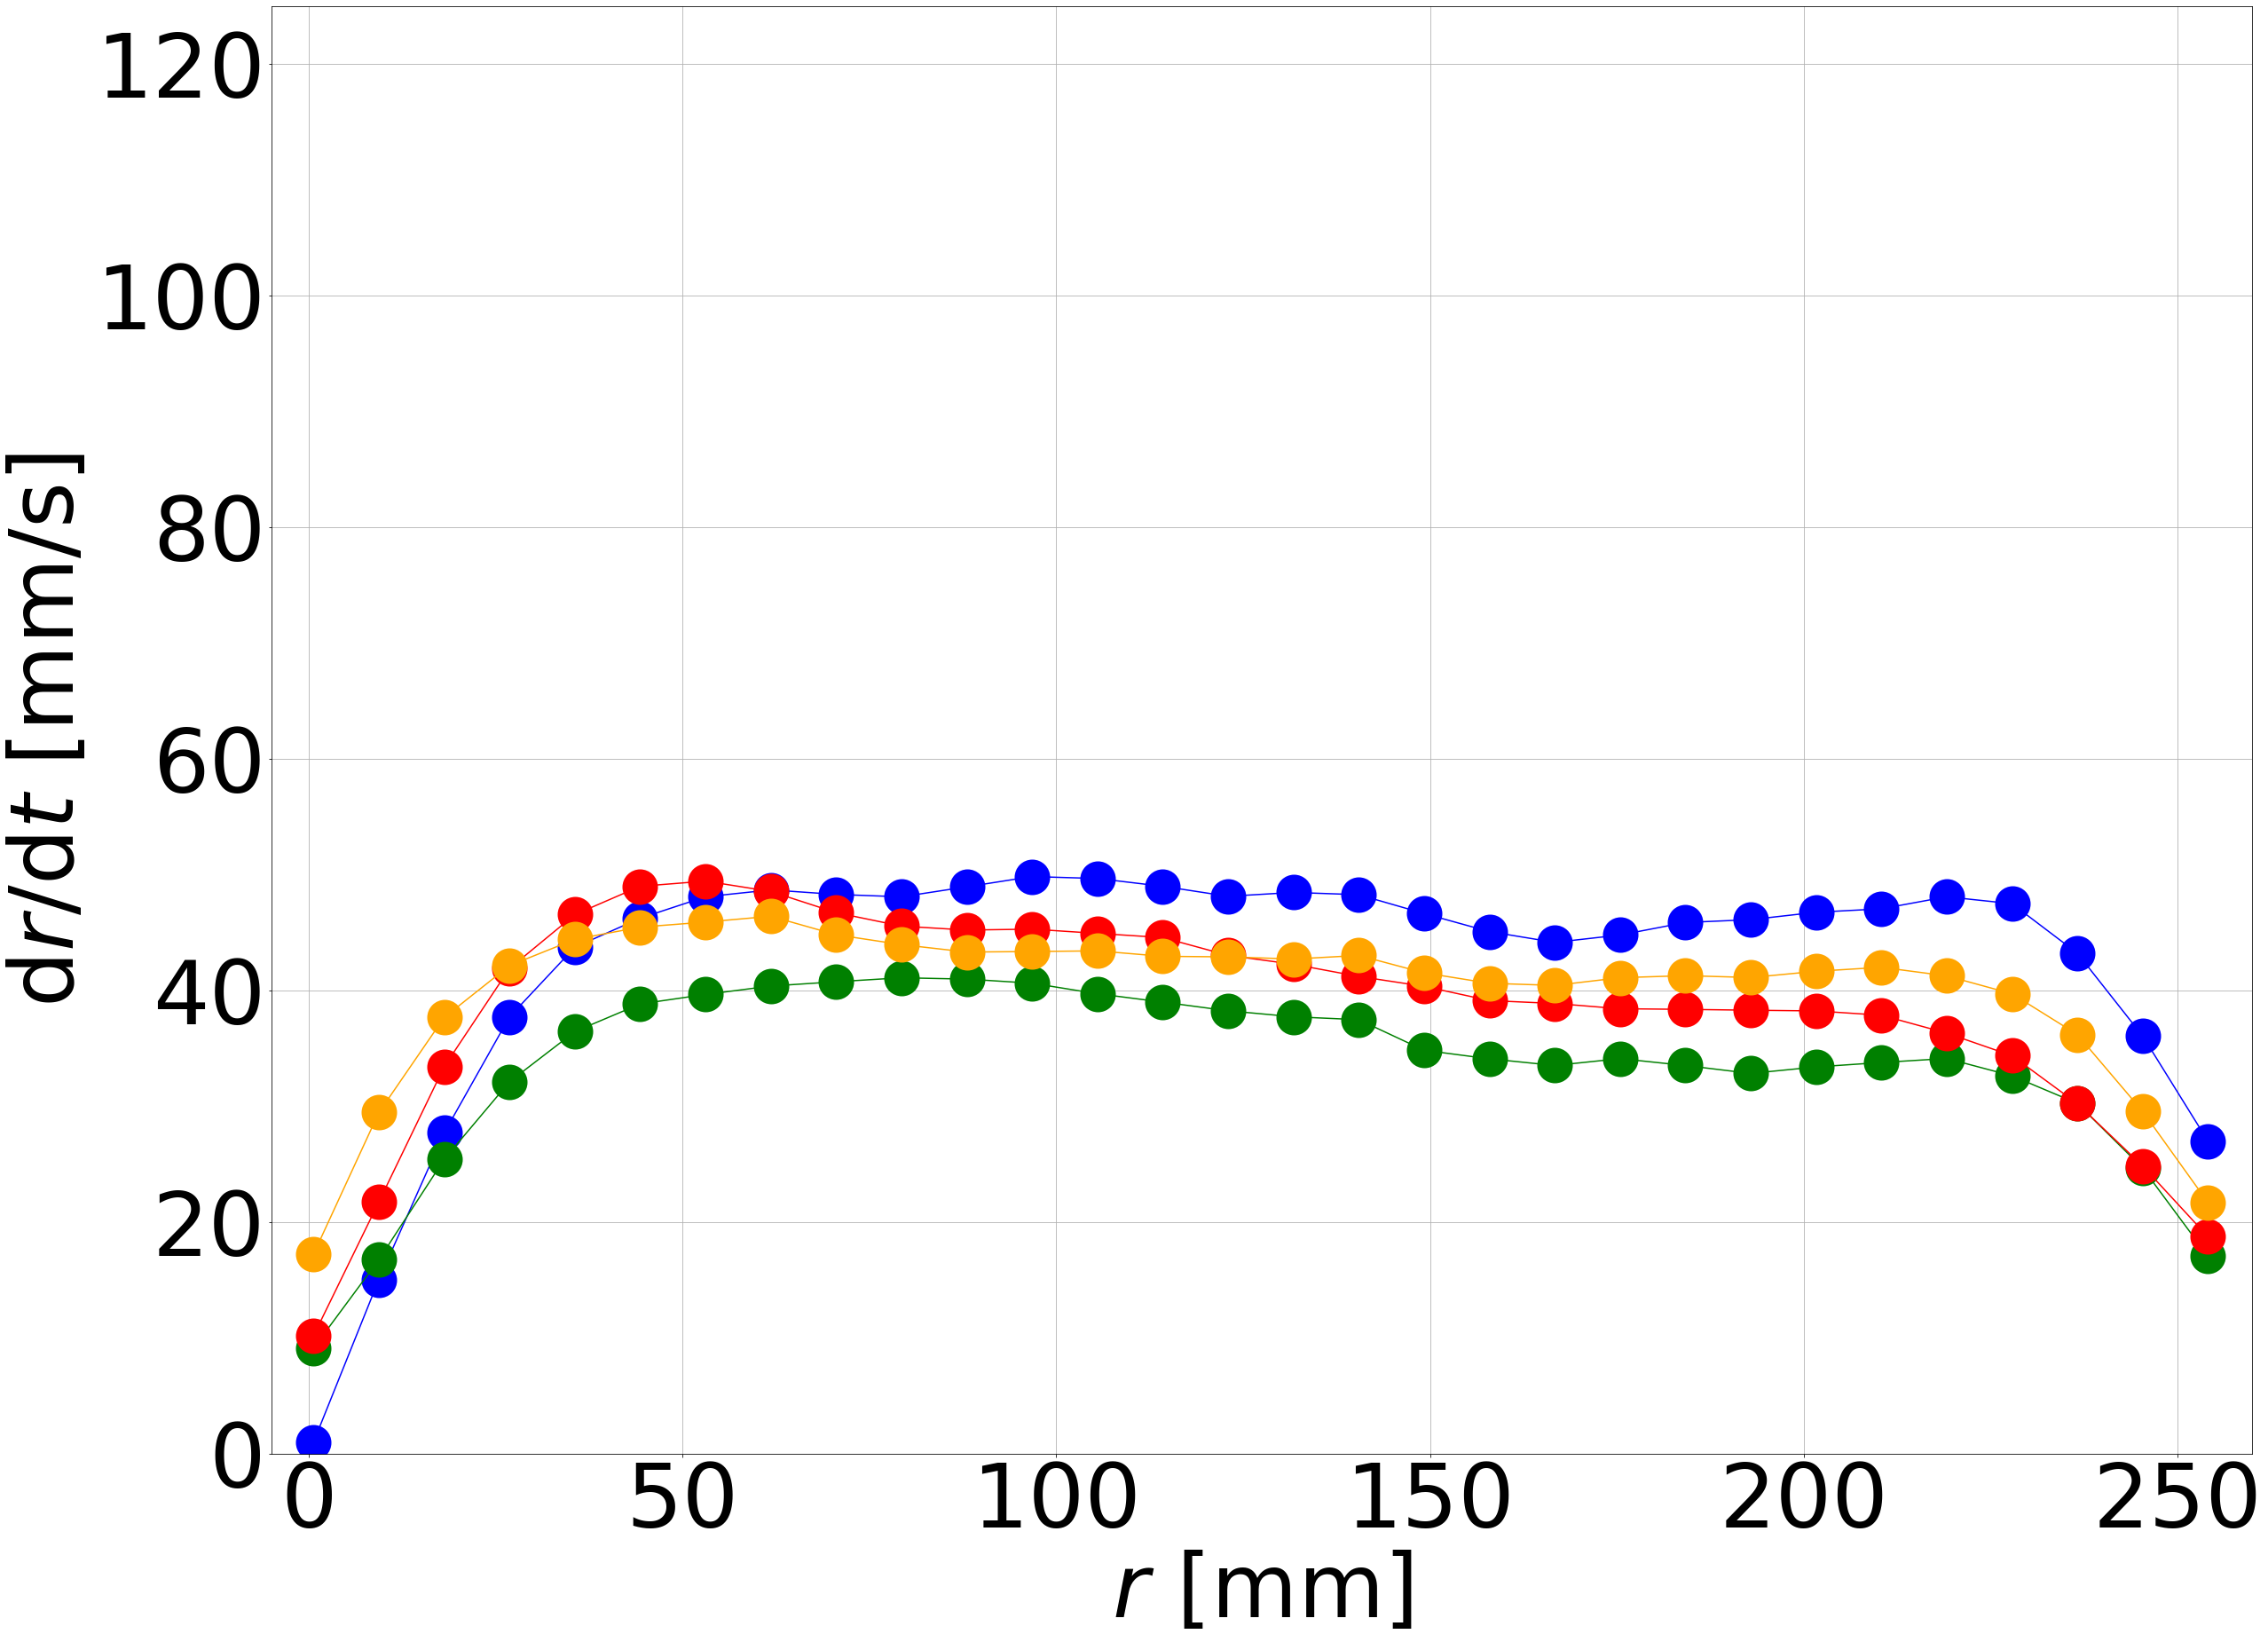

In [39]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="b", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="b", label=f"{1 + i % 3} L/min, 500-500 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 1:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="g", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="g", label=f"{1 + i % 3} L/min, 500-1000 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 2:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="r", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="r", label=f"{1 + i % 3} L/min, 500-1500 ms", markersize=30, markeredgewidth=10)

    else:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="orange", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="orange", label=f"{1 + i % 3} L/min, CBI", markersize=30, markeredgewidth=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_1_1_n.png", dpi=300)
plt.show()

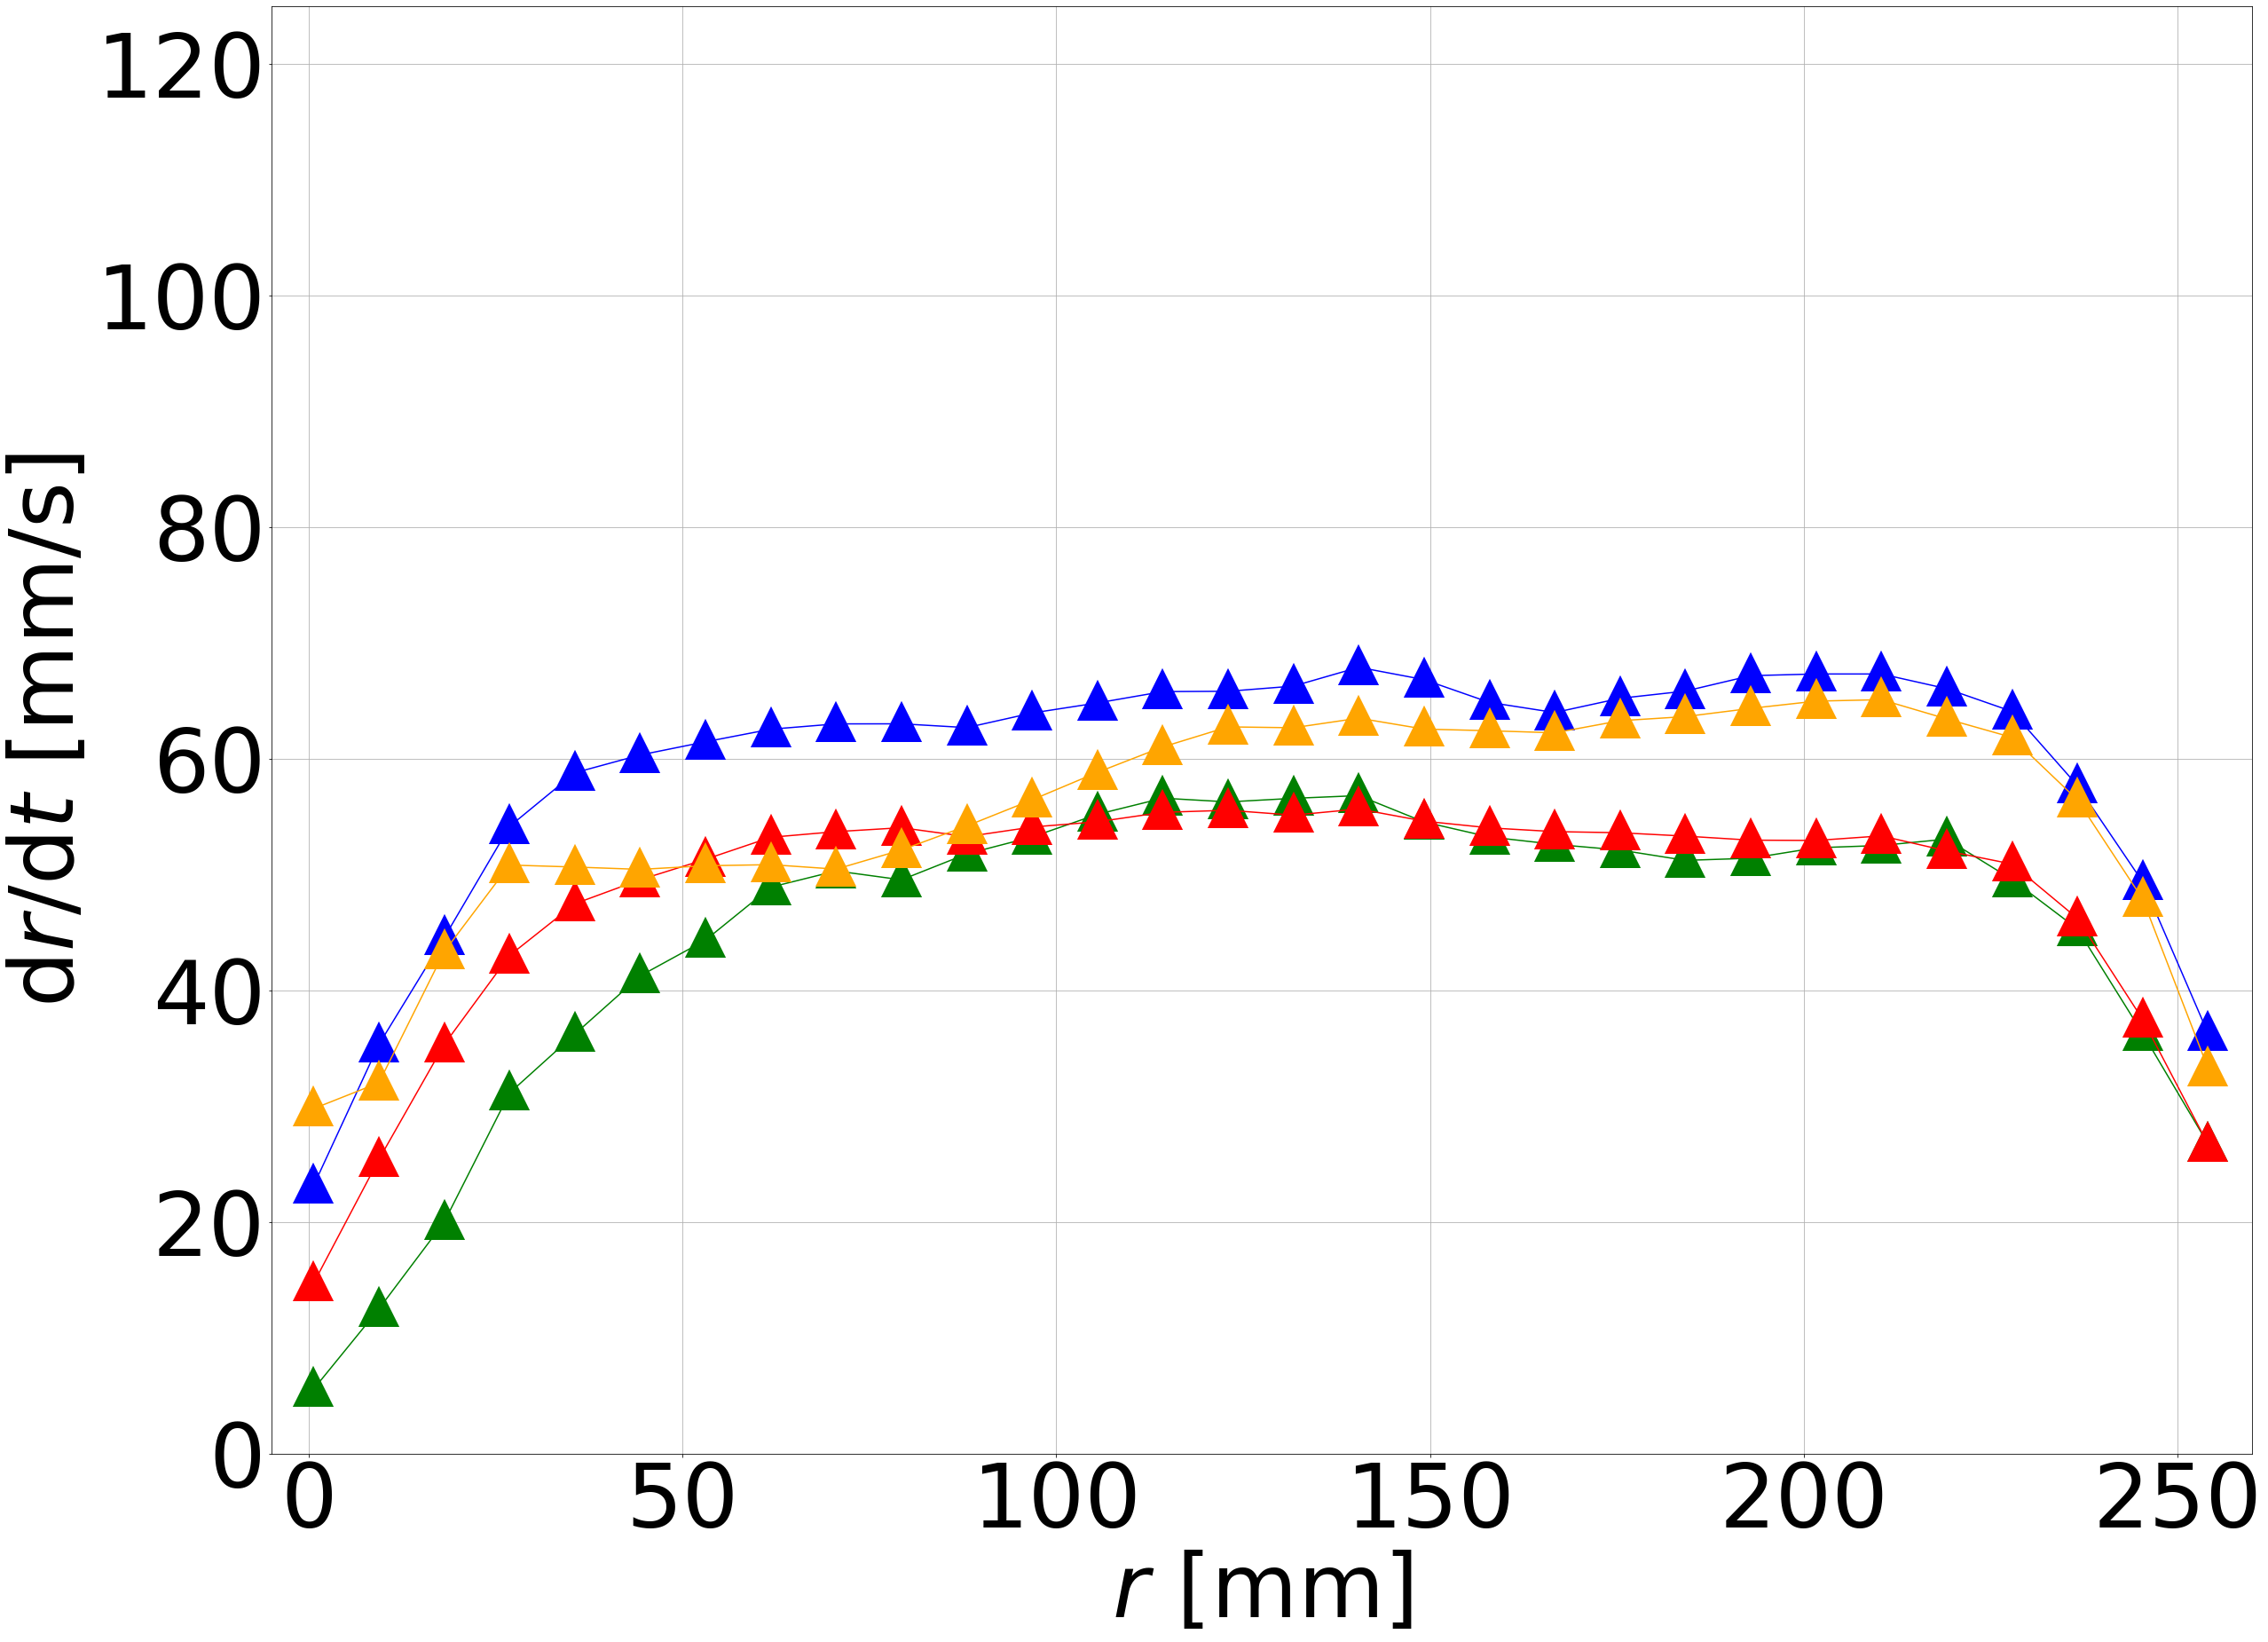

In [40]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="b", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="b", label=f"{1 + i % 3} L/min, 500-500 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 1:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="g", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="g", label=f"{1 + i % 3} L/min, 500-1000 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 2:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="r", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="r", label=f"{1 + i % 3} L/min, 500-1500 ms", markersize=30, markeredgewidth=10)

    else:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="orange", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="orange", label=f"{1 + i % 3} L/min, CBI", markersize=30, markeredgewidth=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_2_1_n.png", dpi=300)
plt.show()

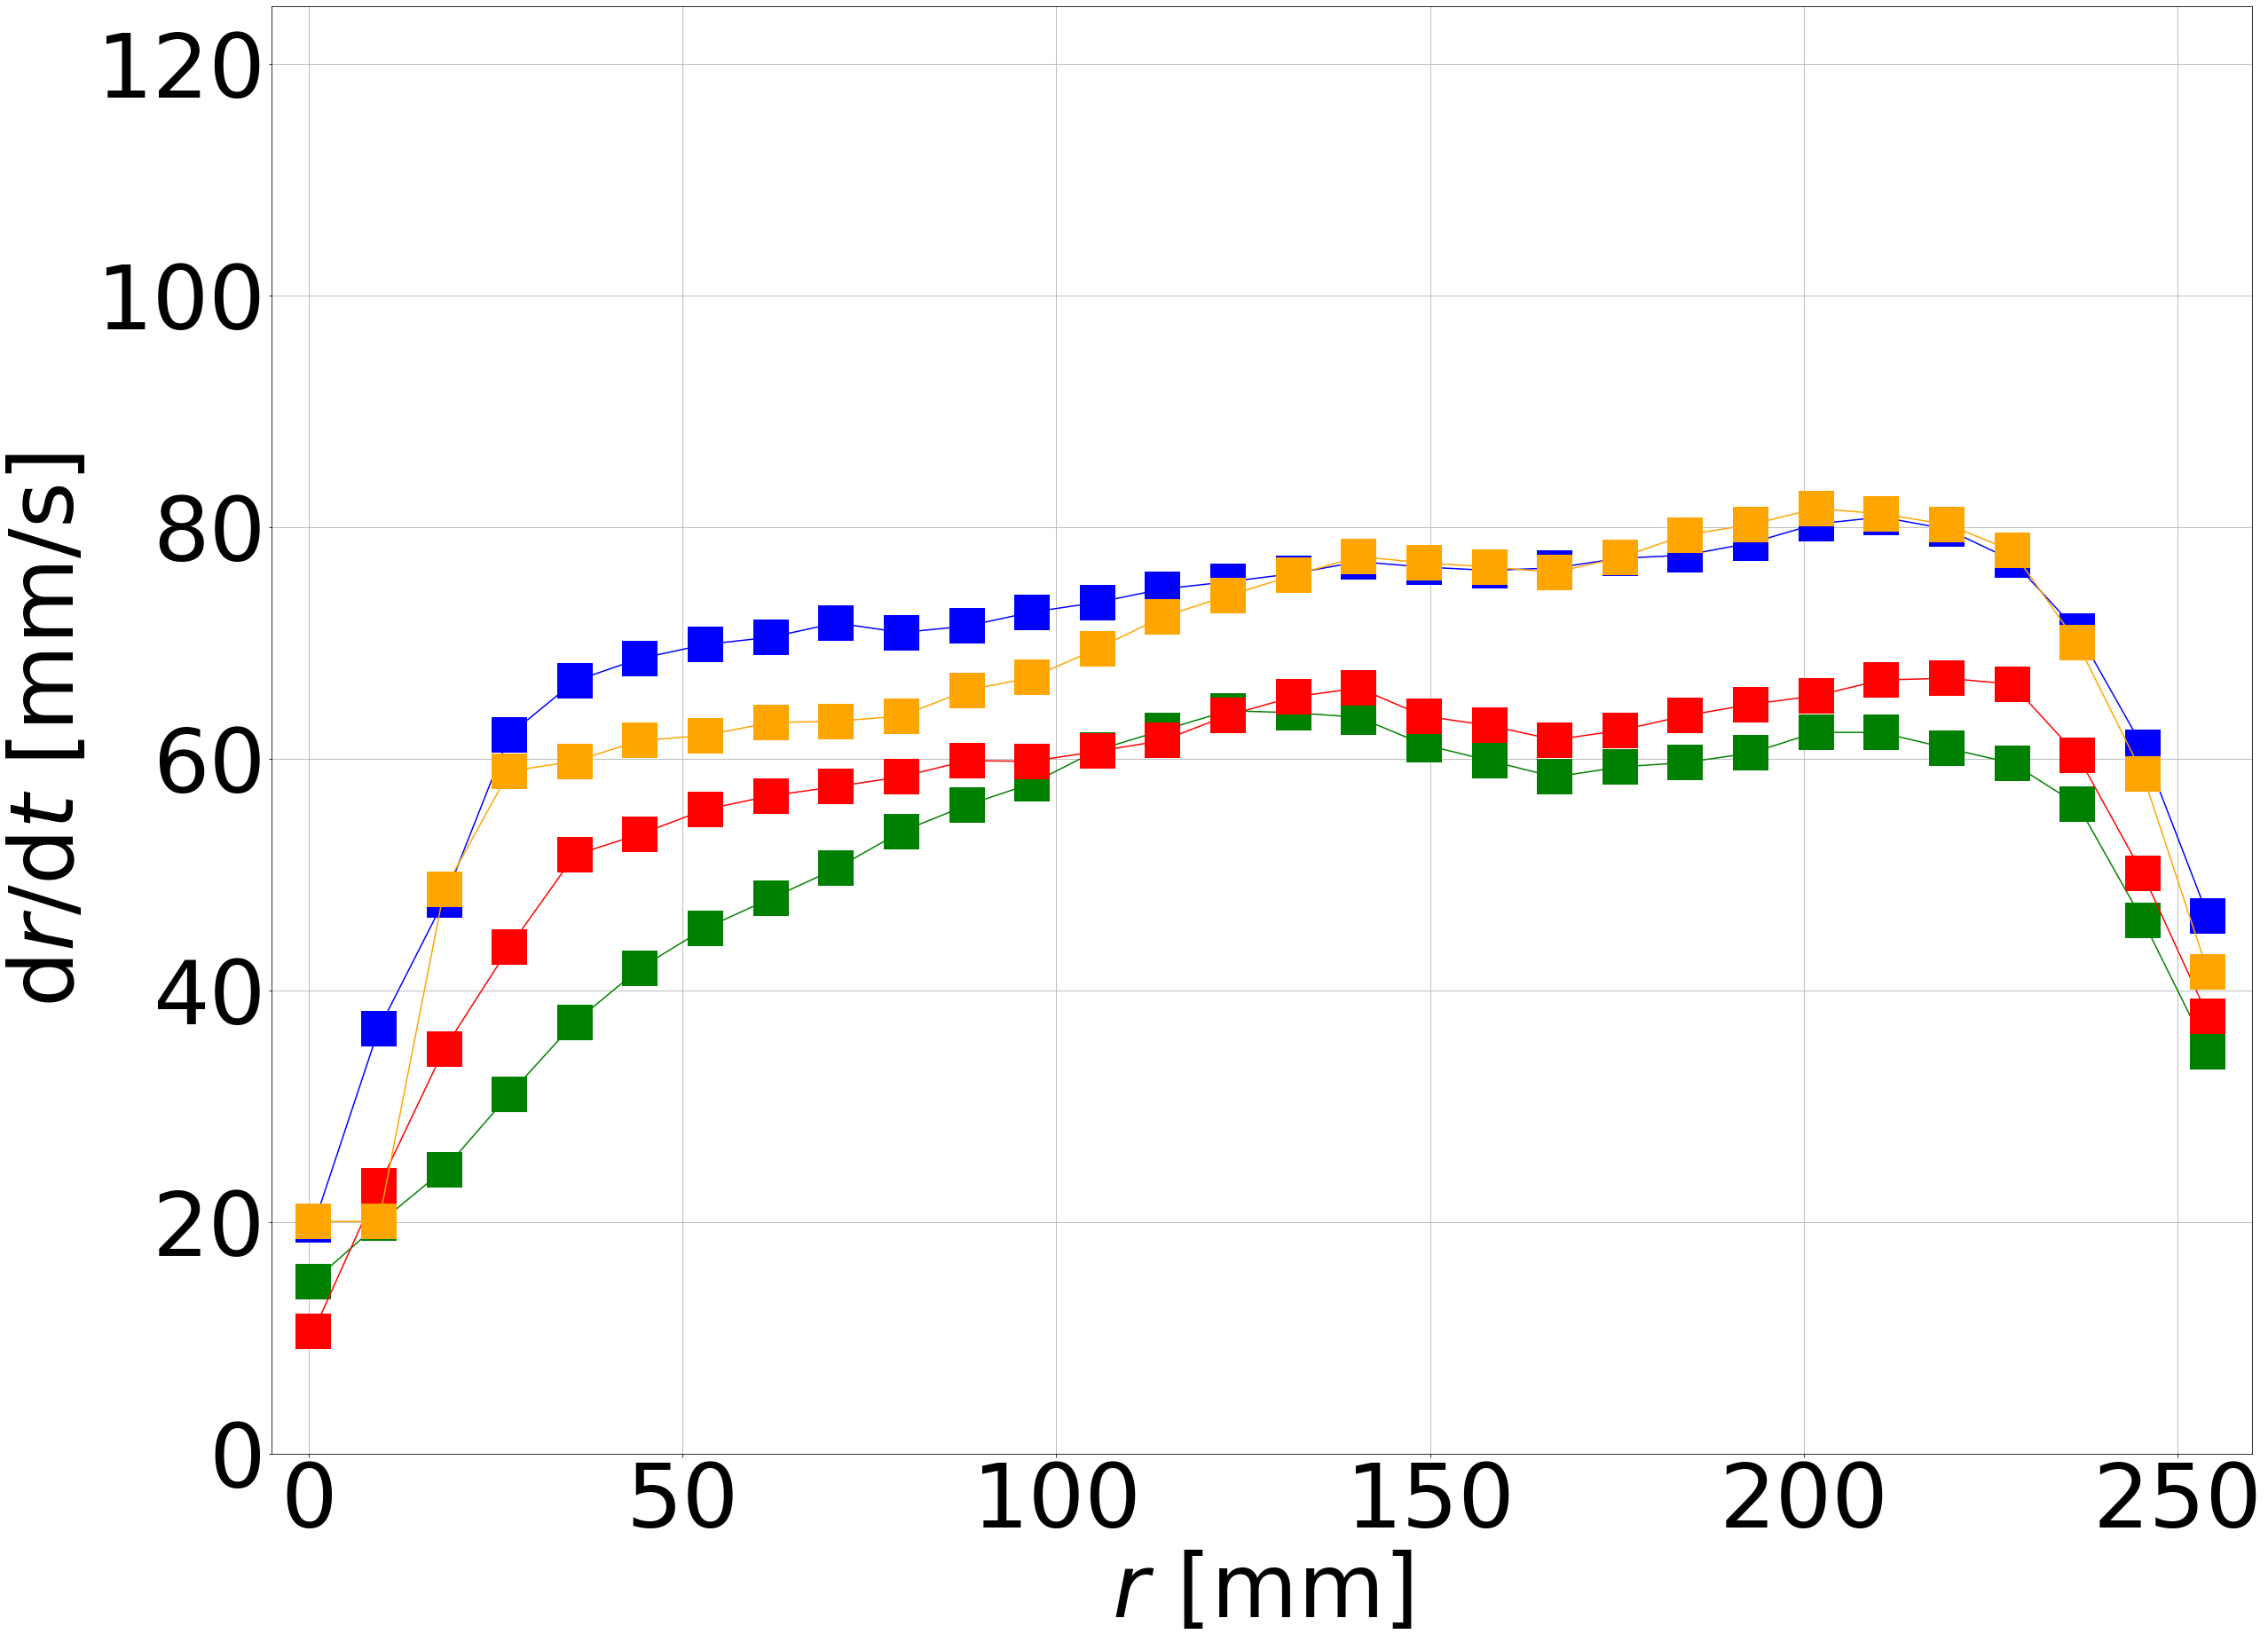

In [41]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="b", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="b", label=f"{1 + i % 3} L/min, 500-500 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 1:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="g", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="g", label=f"{1 + i % 3} L/min, 500-1000 ms", markersize=30, markeredgewidth=10)

    elif i // 3 == 2:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="r", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="r", label=f"{1 + i % 3} L/min, 500-1500 ms", markersize=30, markeredgewidth=10)

    else:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="orange", lw=1.5)
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="orange", label=f"{1 + i % 3} L/min, CBI", markersize=30, markeredgewidth=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_3_1_n.png", dpi=300)
plt.show()

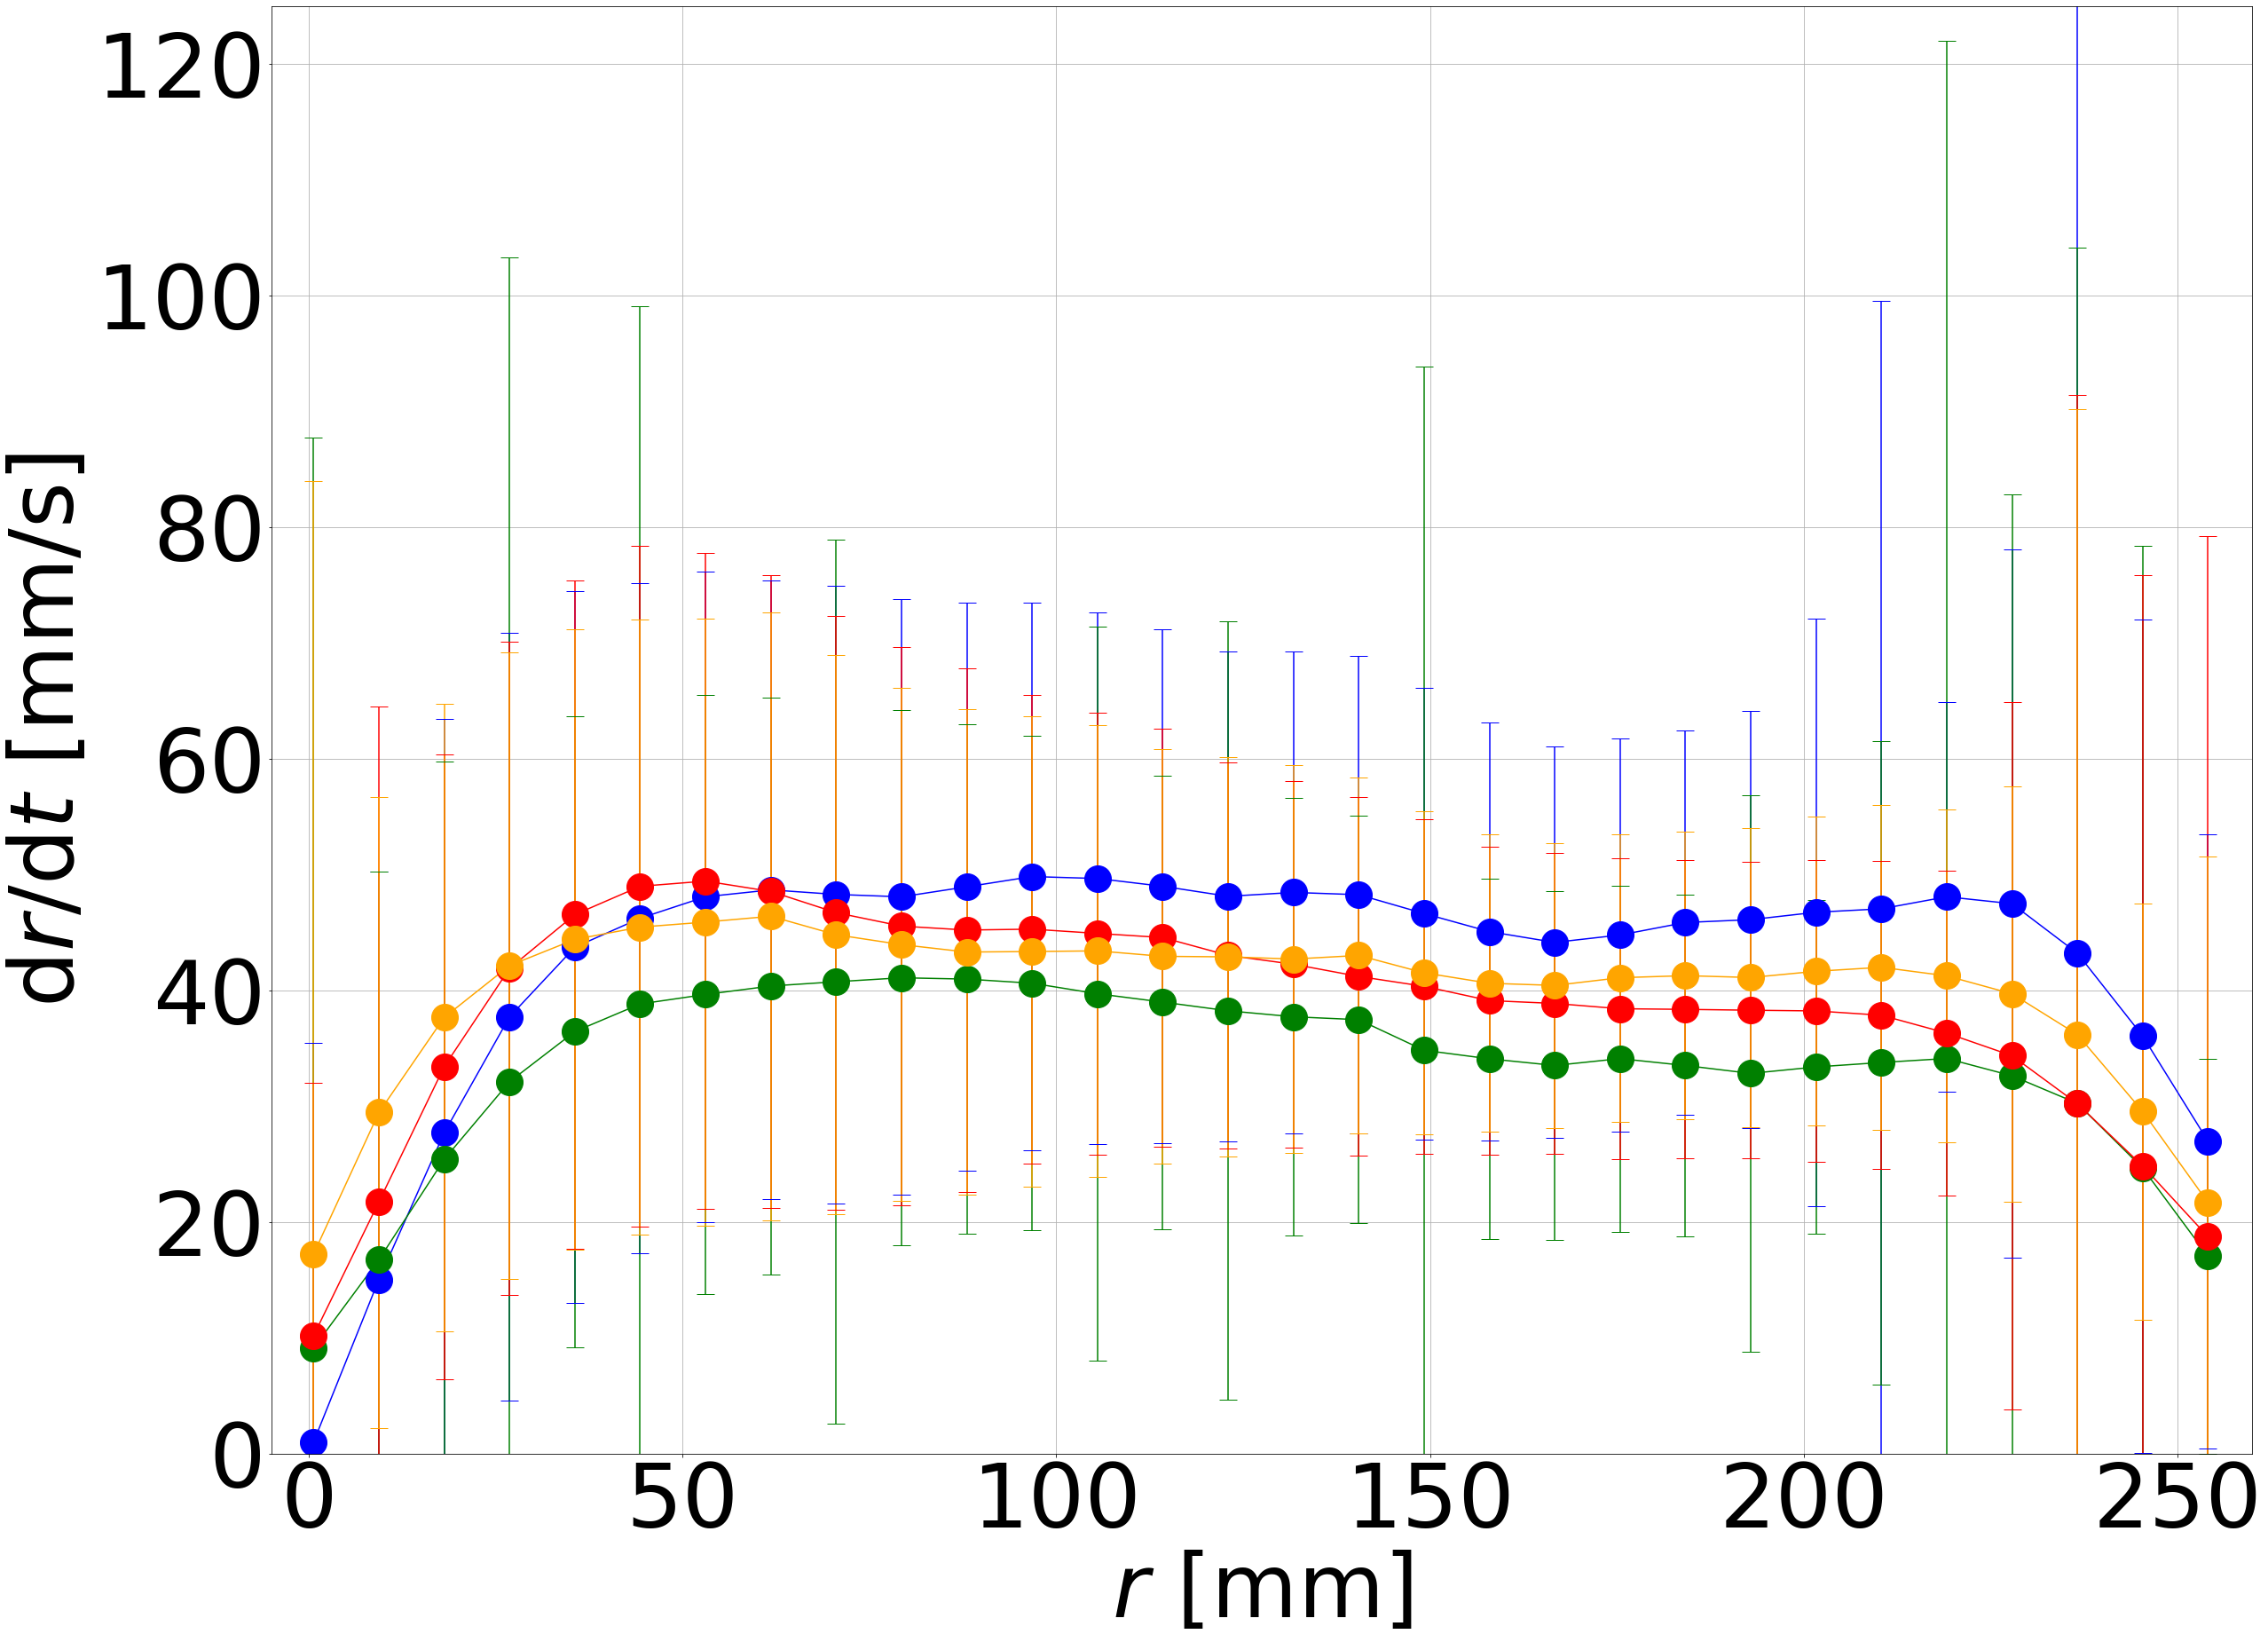

In [42]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="b", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='o', markersize=30, ecolor='b', markeredgecolor="b", color='b', label=f"{1 + i % 3} L/min 500-500 ms")

    elif i // 3 == 1:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="g", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='o', markersize=30, ecolor='g', markeredgecolor="g", color='g', label=f"{1 + i % 3} L/min 500-1000 ms")

    elif i // 3 == 2:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="r", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='o', markersize=30, ecolor='r', markeredgecolor="r", color='r', label=f"{1 + i % 3} L/min 500-1500 ms")

    else:
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], color="orange", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='o', markersize=30, ecolor='orange', markeredgecolor="orange", color='orange', label=f"{1 + i % 3} L/min CBI")

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_1_1_e_n.png", dpi=300)
plt.show()

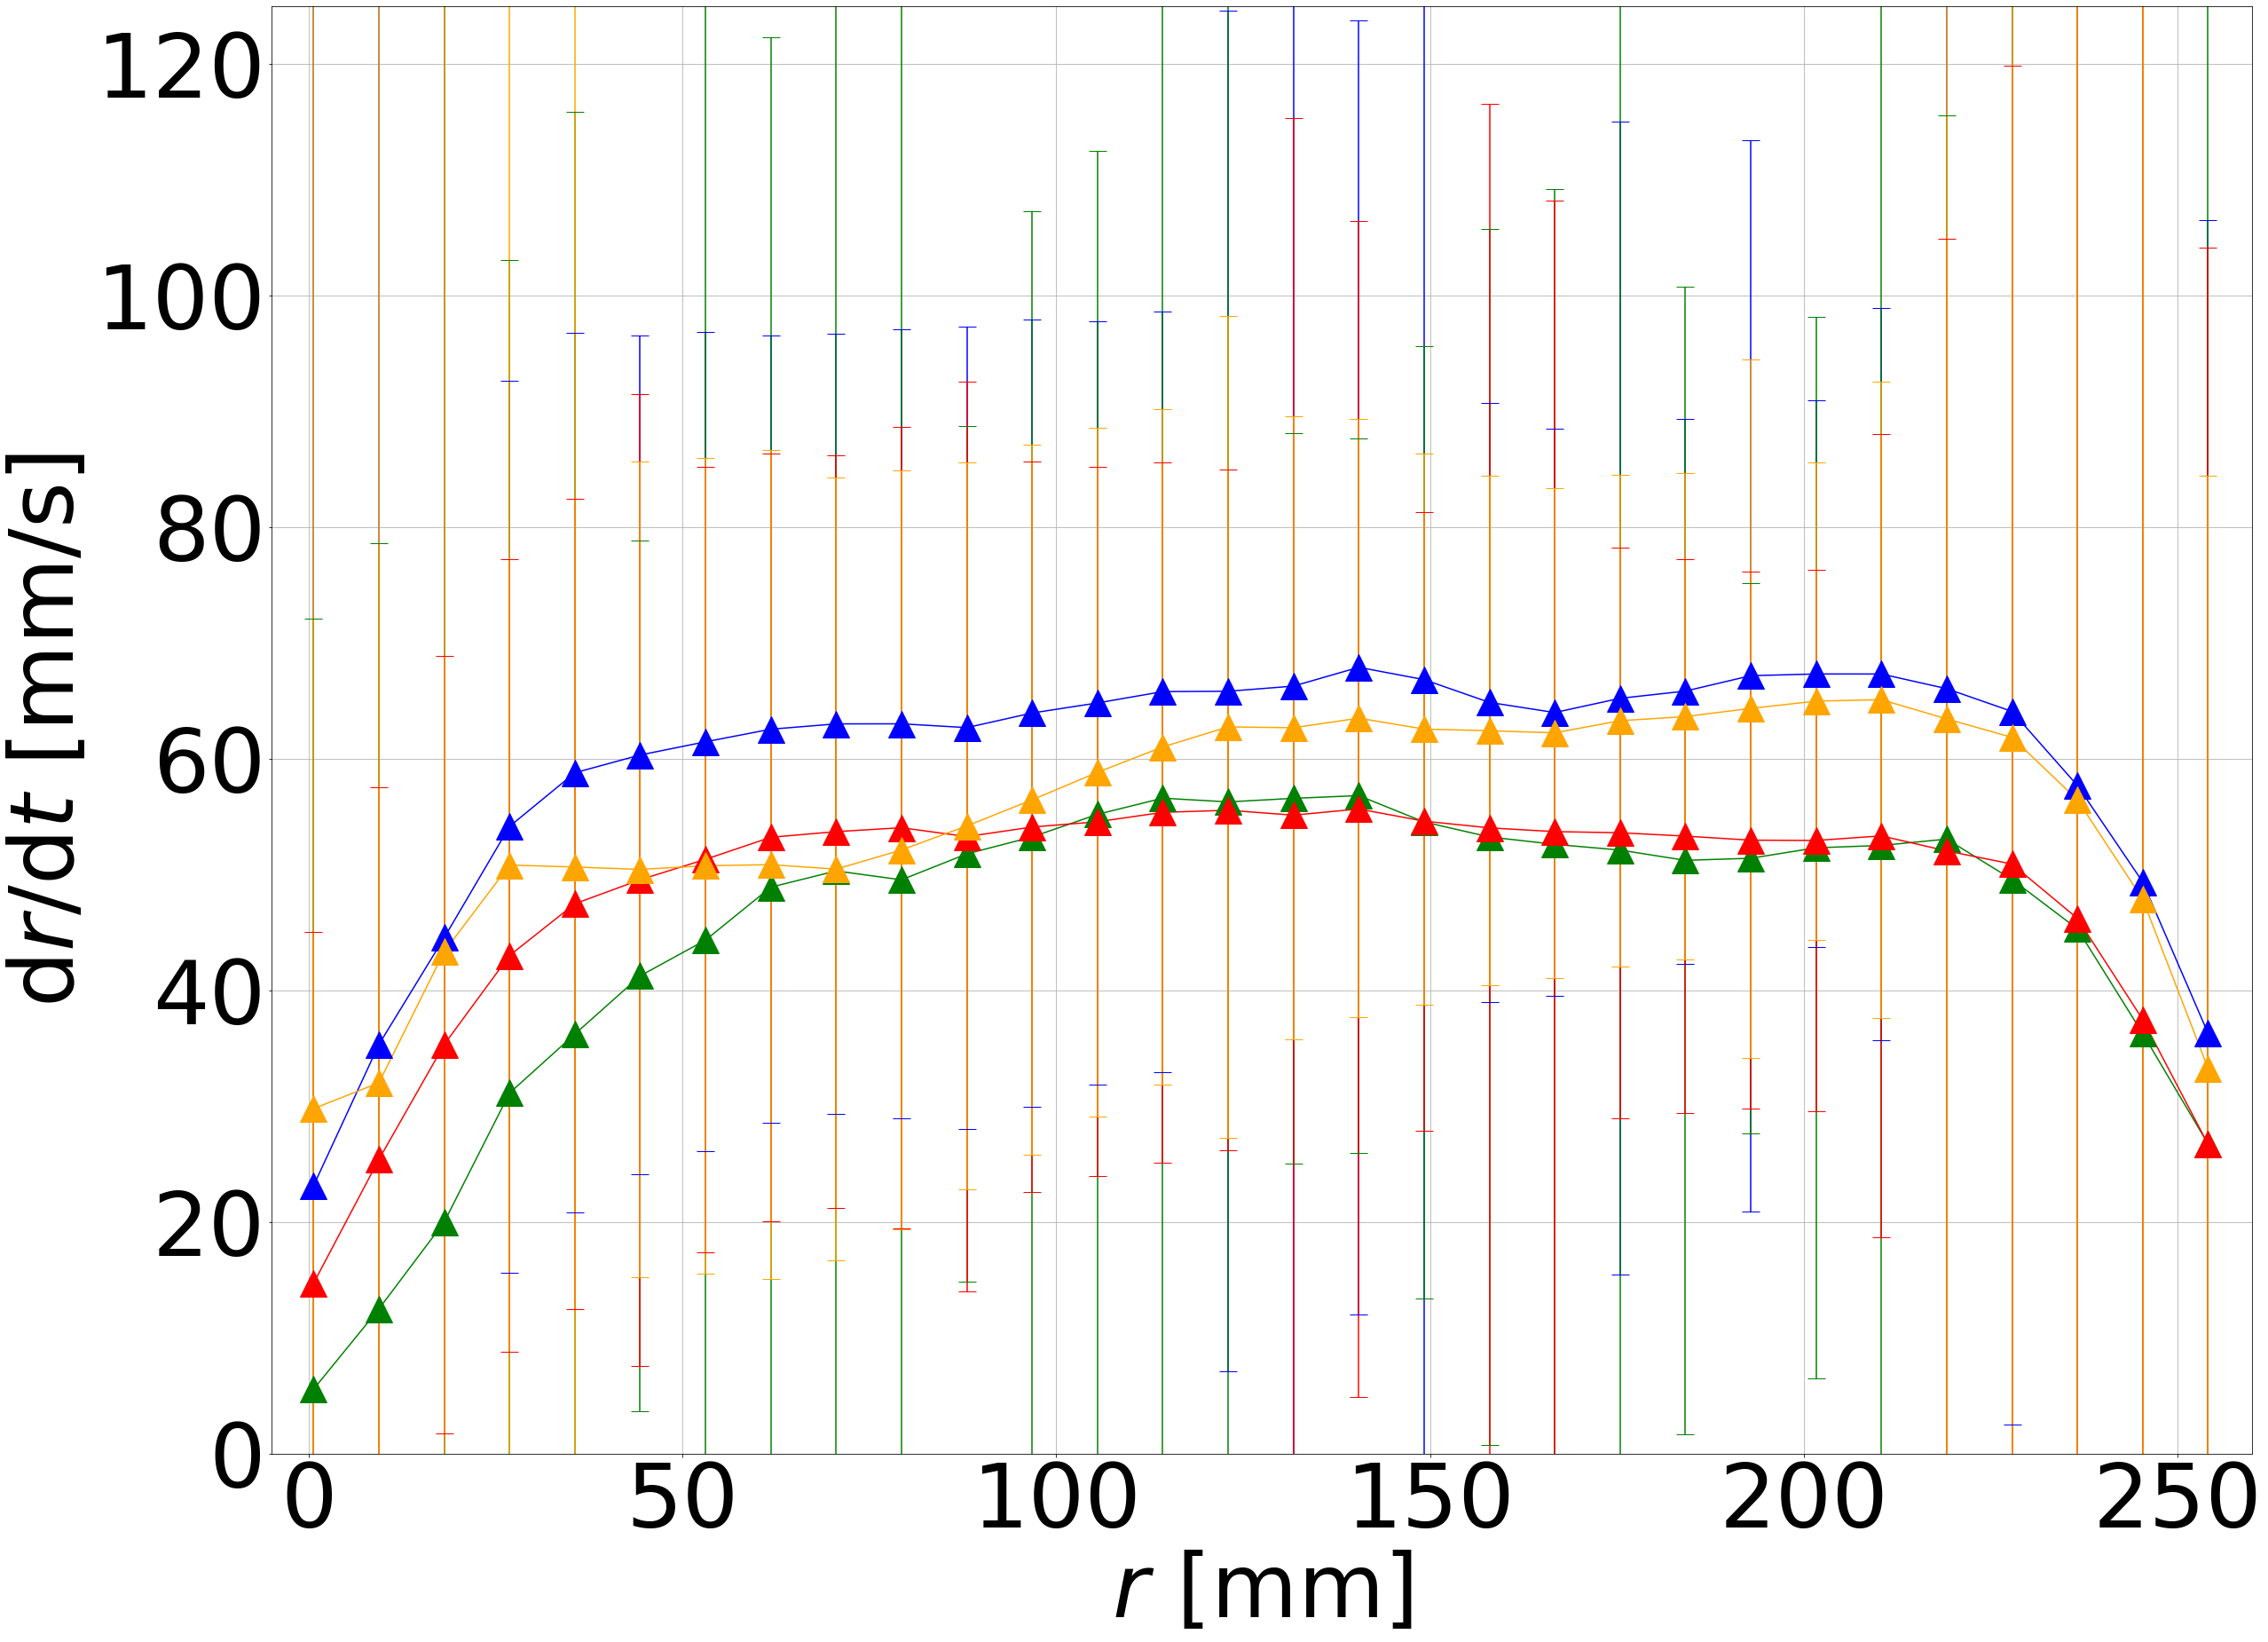

In [43]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="b", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='^', markersize=30, ecolor='b', markeredgecolor="b", color='b', label=f"{1 + i % 3} L/min 500-500 ms")

    elif i // 3 == 1:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="g", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='^', markersize=30, ecolor='g', markeredgecolor="g", color='g', label=f"{1 + i % 3} L/min 500-1000 ms")

    elif i // 3 == 2:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="r", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='^', markersize=30, ecolor='r', markeredgecolor="r", color='r', label=f"{1 + i % 3} L/min 500-1500 ms")

    else:
        if i % 3 == 1:
            ax.plot(x, -ave_dx[i], color="orange", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='^', markersize=30, ecolor='orange', markeredgecolor="orange", color='orange', label=f"{1 + i % 3} L/min CBI")

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_2_1_e_n.png", dpi=300)
plt.show()

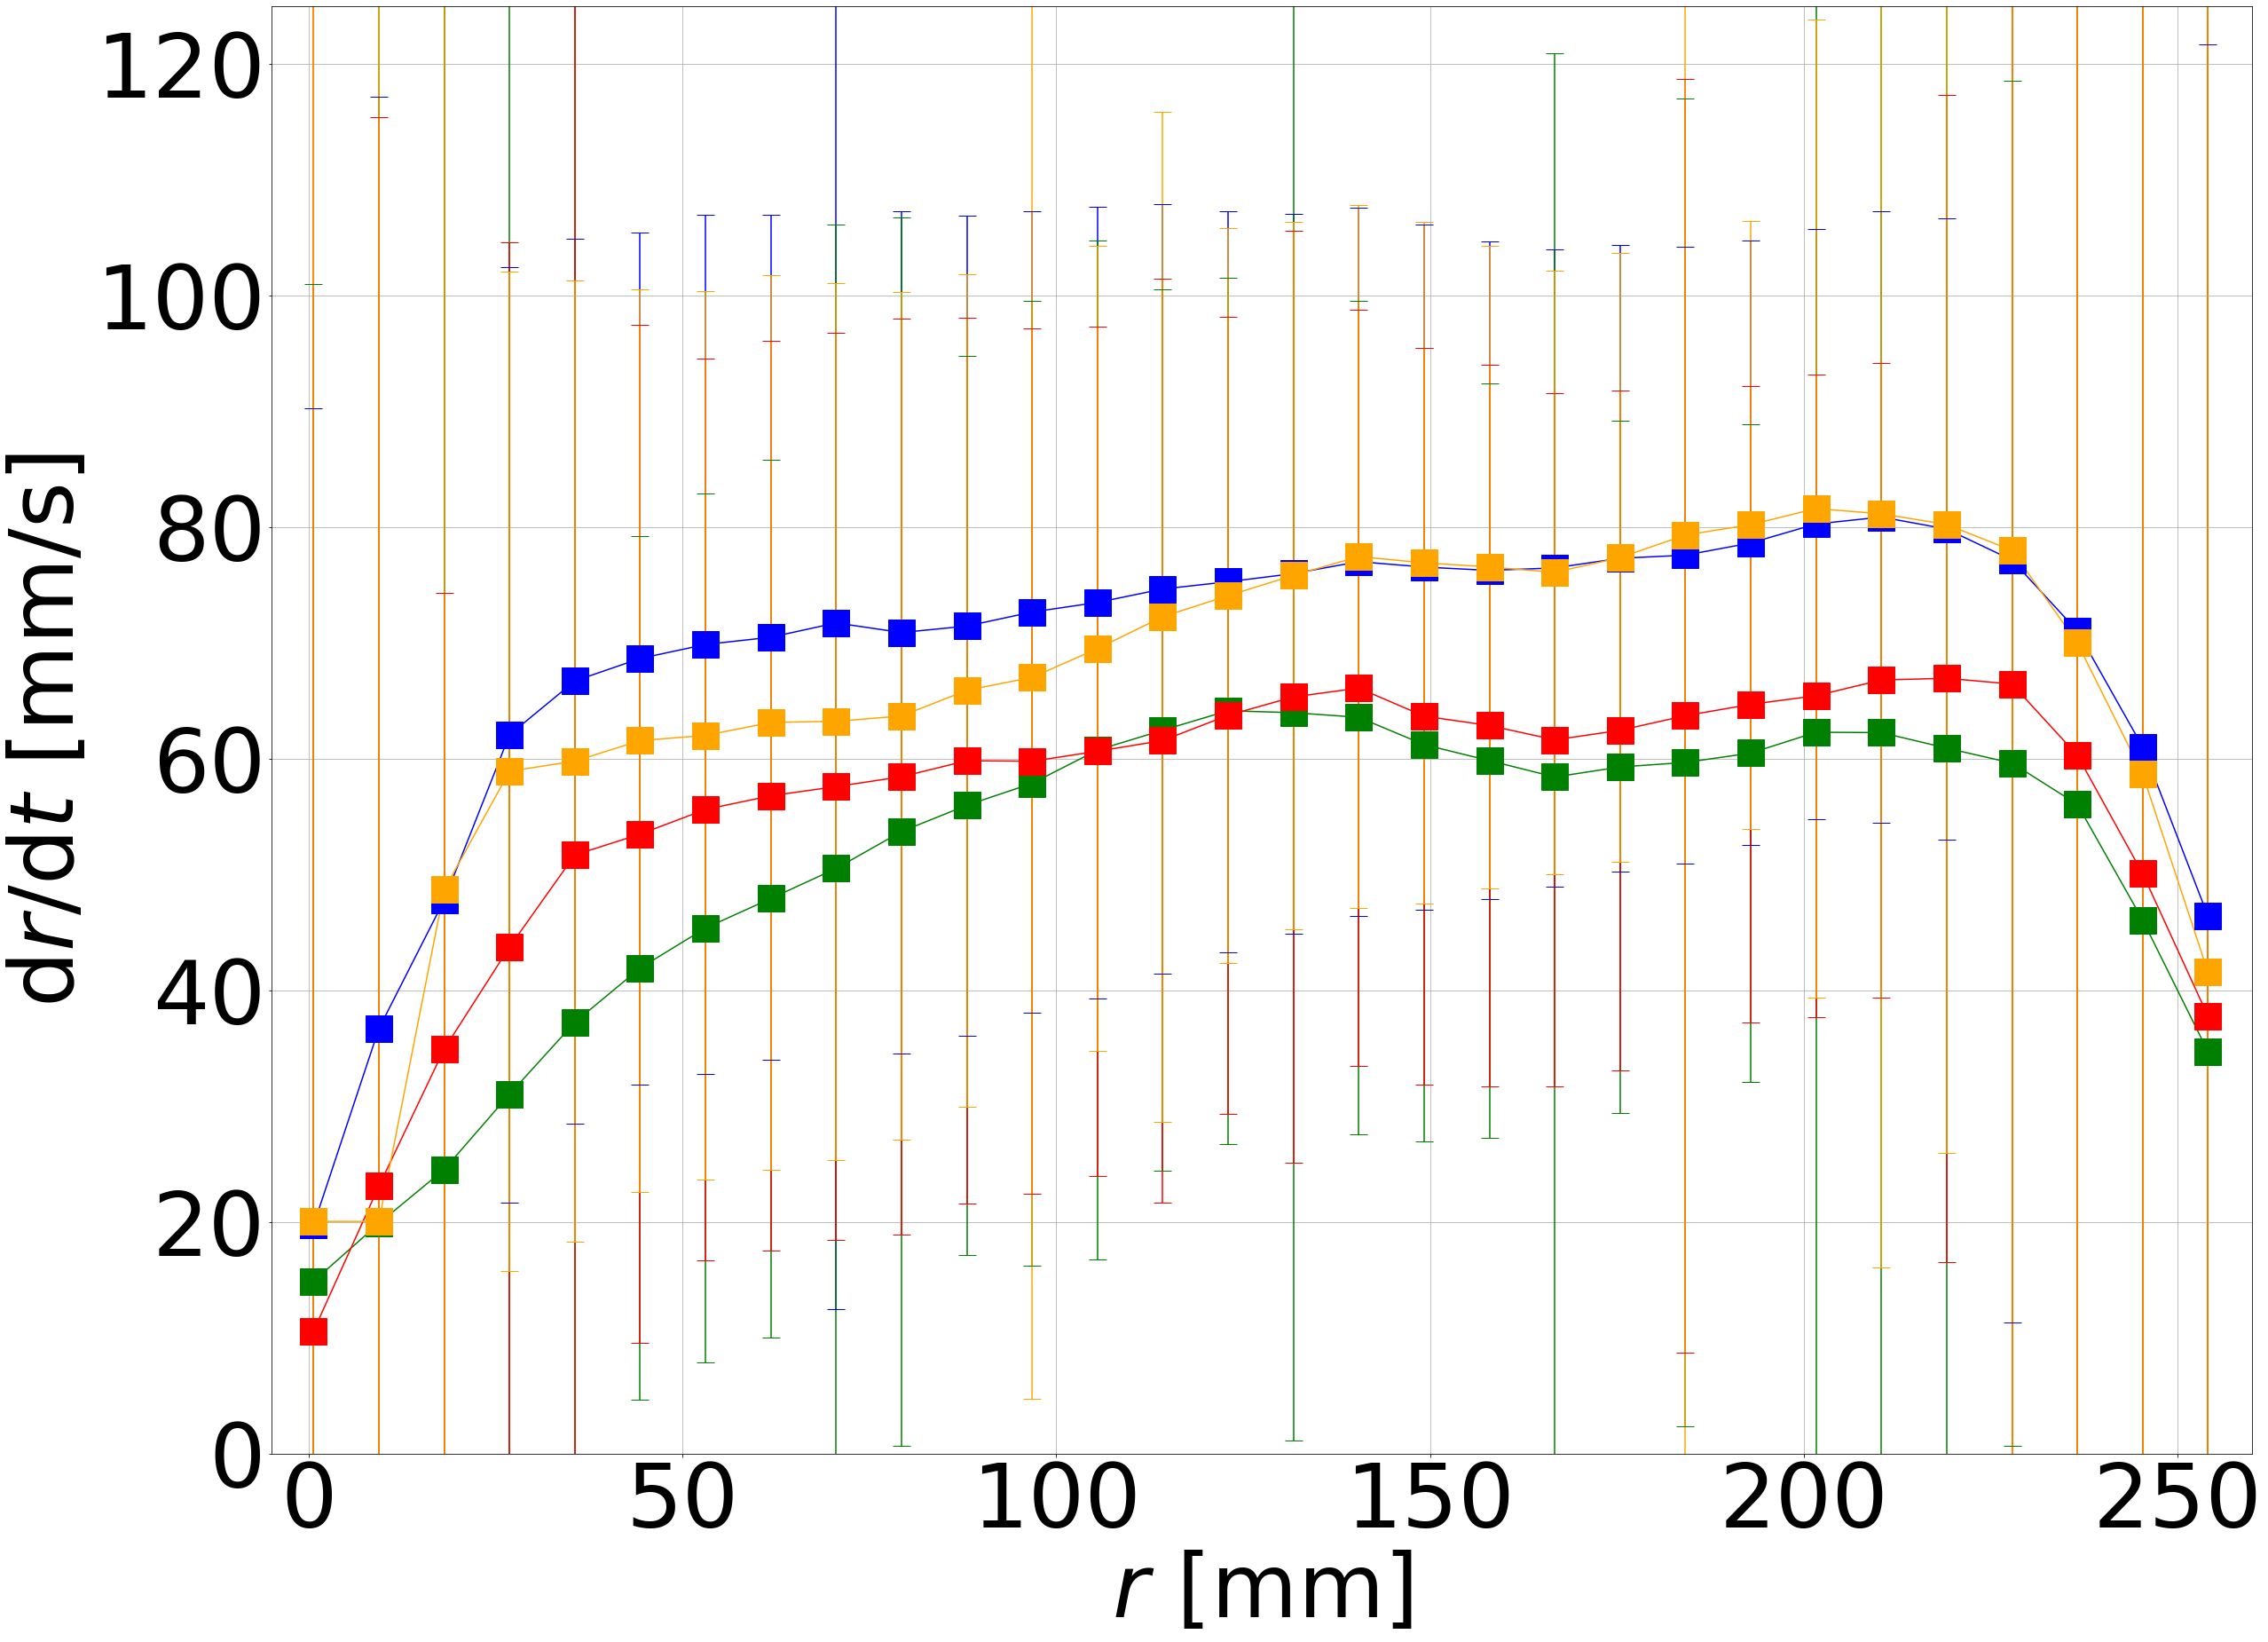

In [44]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="b", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='s', markersize=30, ecolor='b', markeredgecolor="b", color='b', label=f"{1 + i % 3} L/min 500-500 ms")

    elif i // 3 == 1:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="g", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='s', markersize=30, ecolor='g', markeredgecolor="g", color='g', label=f"{1 + i % 3} L/min 500-1000 ms")

    elif i // 3 == 2:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="r", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='s', markersize=30, ecolor='r', markeredgecolor="r", color='r', label=f"{1 + i % 3} L/min 500-1500 ms")

    else:
        if i % 3 == 2:
            ax.plot(x, -ave_dx[i], color="orange", lw=1.5)
            ax.errorbar(x, -ave_dx[i], yerr=std_dx[i], capsize=10, fmt='s', markersize=30, ecolor='orange', markeredgecolor="orange", color='orange', label=f"{1 + i % 3} L/min CBI")

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_3_1_e_n.png", dpi=300)
plt.show()

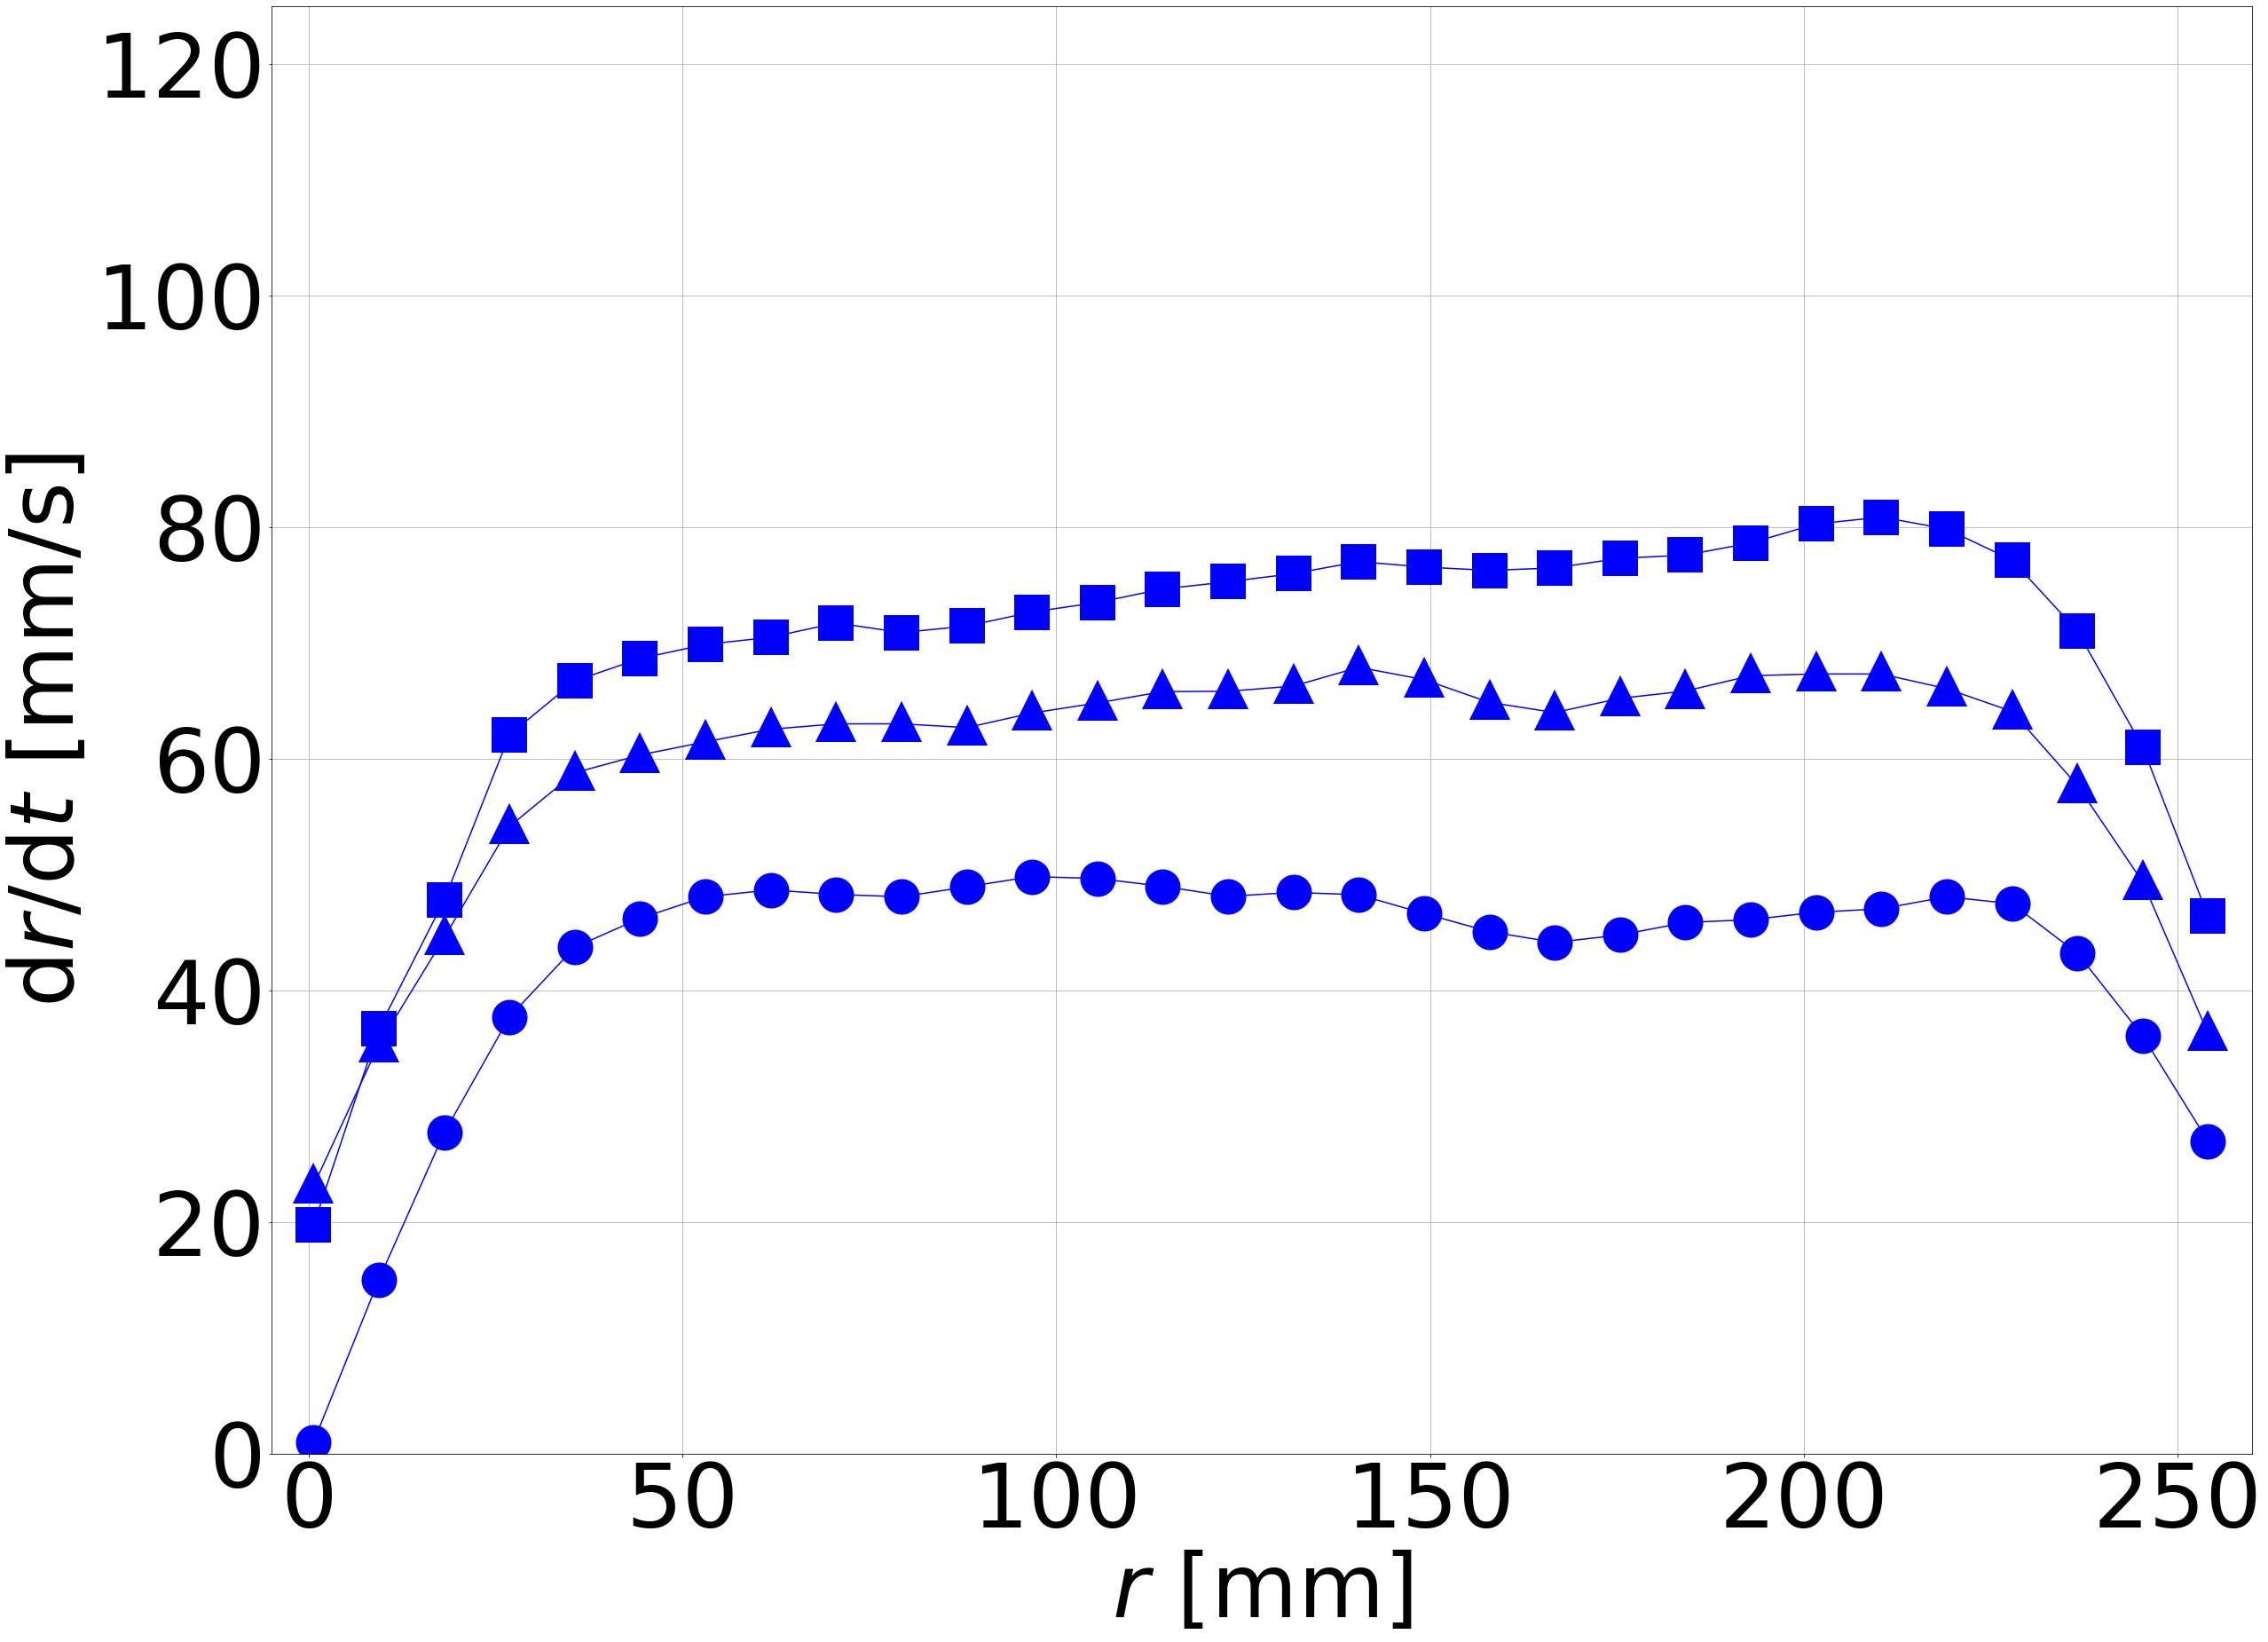

In [45]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 0:
        ax.plot(x, -ave_dx[i], color="b", lw=1.5)
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="b", label=f"{1 + i % 3} L/min, 500-500 ms", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="b", label=f"{1 + i % 3} L/min, 500-500 ms", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="b", label=f"{1 + i % 3} L/min, 500-500 ms", markersize=30, markeredgewidth=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_1_2_n.png", dpi=300)
plt.show()

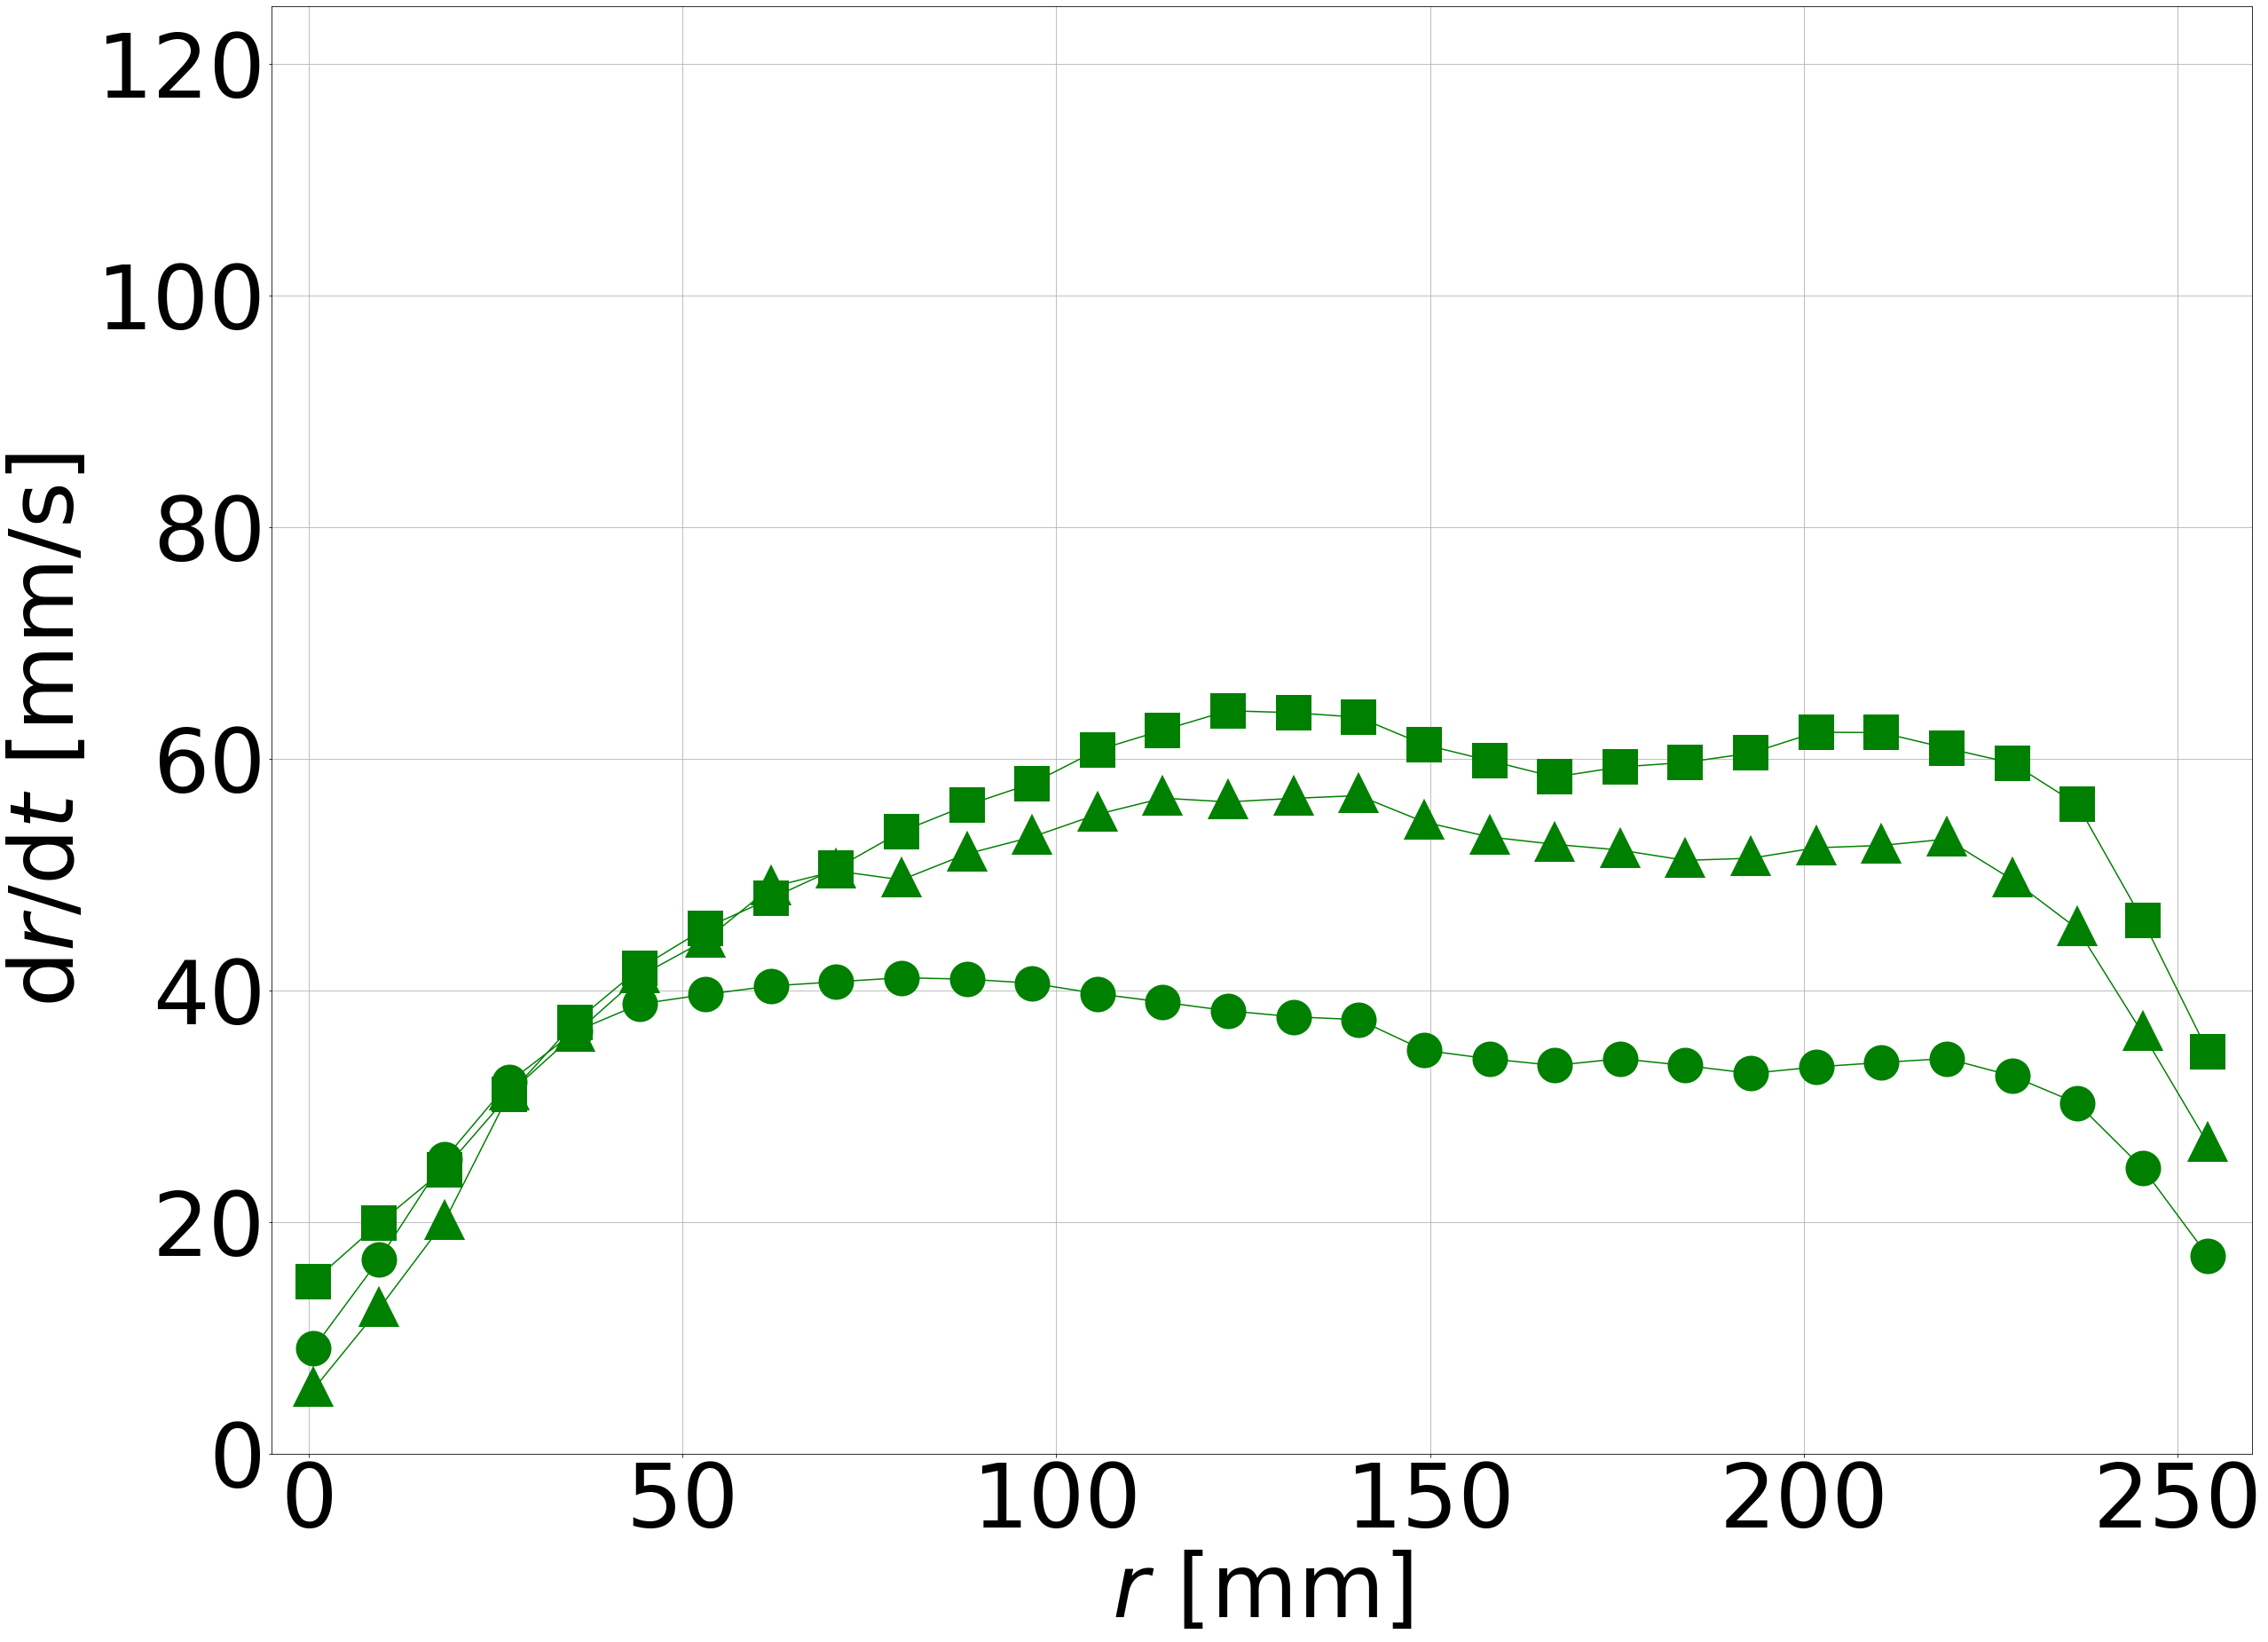

In [46]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 1:
        ax.plot(x, -ave_dx[i], color="g", lw=1.5)
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="g", label=f"{1 + i % 3} L/min, 500-1000 ms", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="g", label=f"{1 + i % 3} L/min, 500-1000 ms", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="g", label=f"{1 + i % 3} L/min, 500-1000 ms", markersize=30, markeredgewidth=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_2_2_n.png", dpi=300)
plt.show()

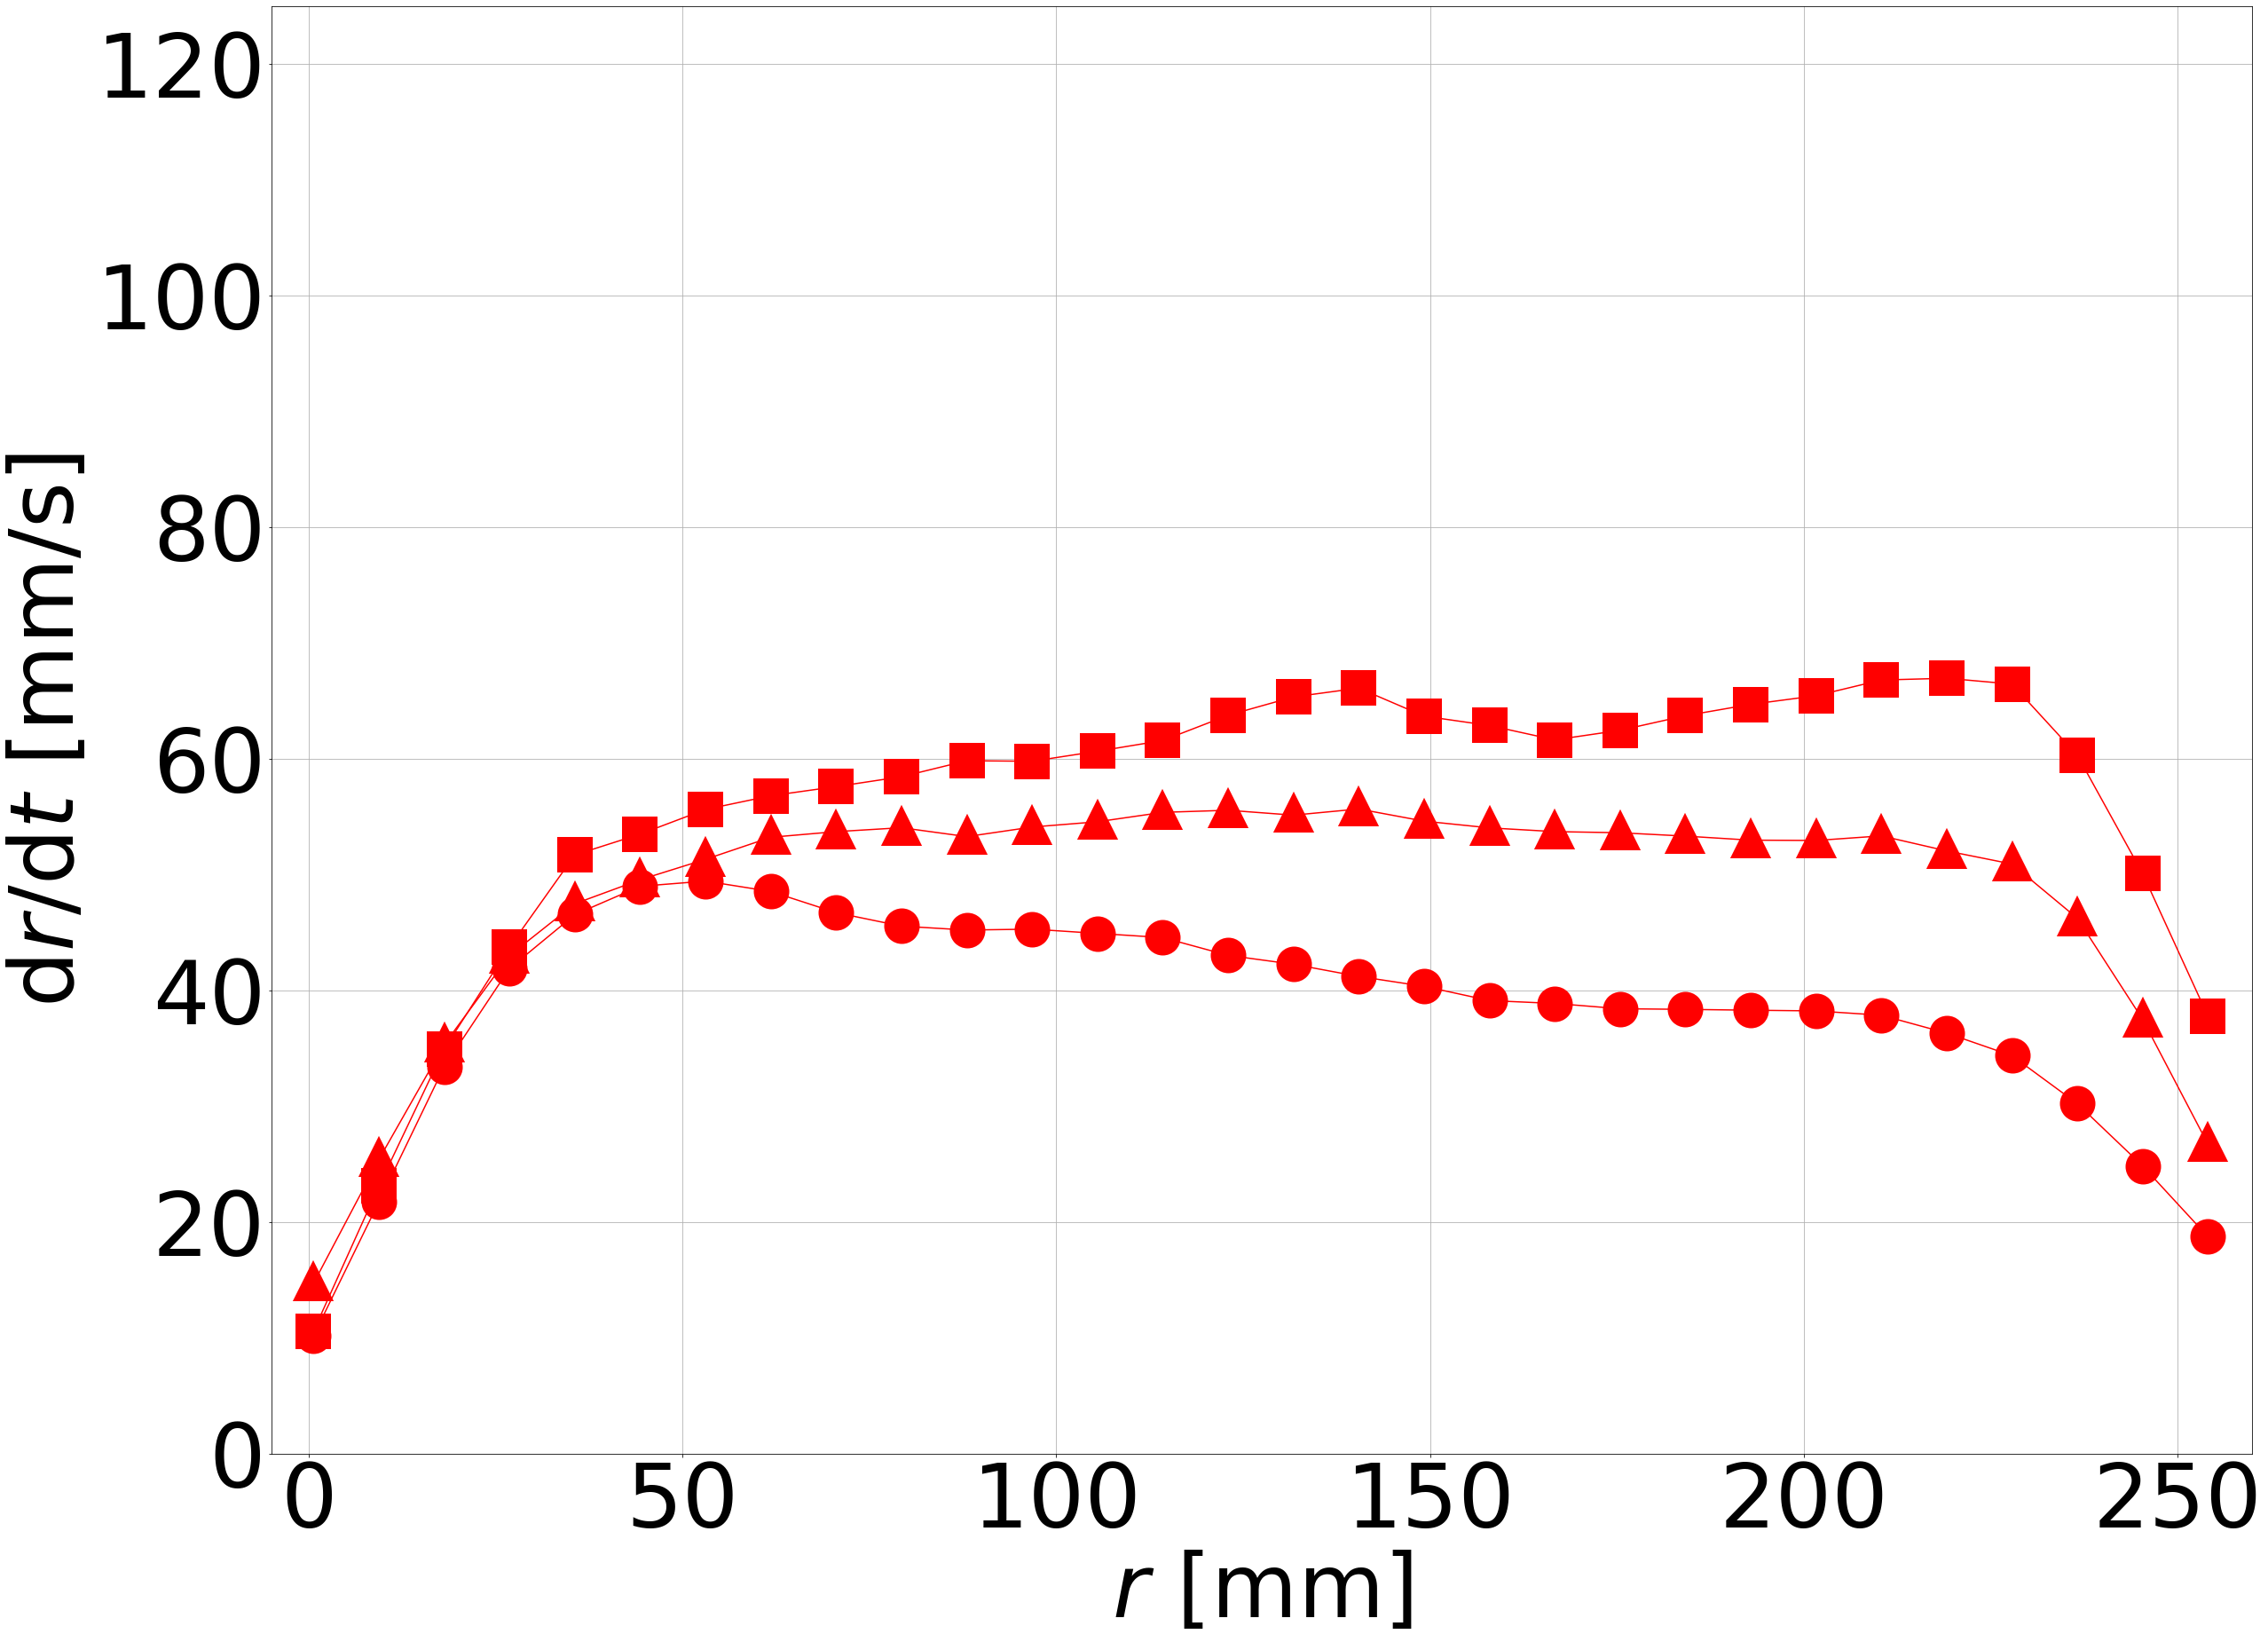

In [47]:
fig, ax = plt.subplots(figsize=(40, 30))
m = ["o", "^", "s"]
plt.xlim(-5, 260)
plt.ylim(0, 125)
plt.xlabel("$r$ [mm]", fontsize=100)
plt.ylabel("d$r/$d$t$ [mm/s]", fontsize=100)
plt.xticks(fontsize=100)
plt.yticks(fontsize=100)

for i in range(len(ave_dx)):
    if i // 3 == 2:
        ax.plot(x, -ave_dx[i], color="r", lw=1.5)
        if i % 3 == 0:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="r", label=f"{1 + i % 3} L/min, 500-1500 ms", markersize=30, markeredgewidth=10)
        elif i % 3 == 1:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="r", label=f"{1 + i % 3} L/min, 500-1500 ms", markersize=30, markeredgewidth=10)
        else:
            ax.plot(x, -ave_dx[i], m[round(i%3)], color="r", label=f"{1 + i % 3} L/min, 500-1500 ms", markersize=30, markeredgewidth=10)

# ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=40)
ax.grid()
plt.savefig("surface_3_2_n.png", dpi=300)
plt.show()